## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

In [2]:
!pip install uszipcode
!pip install sqlalchemy-mate==2.0.0.0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.1 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6941 sha256=7d20b08297296af5bafee45a5eb20b22f4b05ee555d1c18ea1fe9076be7cf233
  Stored in directory: /root/.cache/pip/wheels/f7/99/9c/d24e98c35f30eba0c367ad1e7888d396d676abb35fe1e7611c
Successfully built atomicwrites
  Attempting uninstall: sqlalchemy-mate
    Found existing installation: sqlalchemy_mate 2.0.0.3
    Uninstalling sqlalchemy_mate-2.0.0.3:
      Successfully uninstalled sqlalchemy_mate-2.0.0.3


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [3]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Zip Code
from uszipcode import SearchEngine
search = SearchEngine()

# to split the data into train and test sets
from sklearn.model_selection import train_test_split

# to build a decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [5]:
loan_model = pd.read_csv('/content/drive/MyDrive/ml_course/Section 2 Machine Learning/project/Loan_Modelling.csv')

In [6]:
data = loan_model.copy()

## Data Overview

* Observations
* Sanity checks

In [7]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [8]:
data.shape

(5000, 14)

We can see that there are 5000 rows and 14 columns

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All of the data types are int64 except CCAvg which is float.

Later we will convert the category values into objects

In [10]:
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

First thing to note is that there are negative values for Experience which could suggest an inputing error

Second thing to note is there is a wide range in Mortgage suggesting there may be many outliers

In [11]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [12]:
data.duplicated().sum()

np.int64(0)

There are no null values or duplicates

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [13]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [15]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [16]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Numerical Analysis

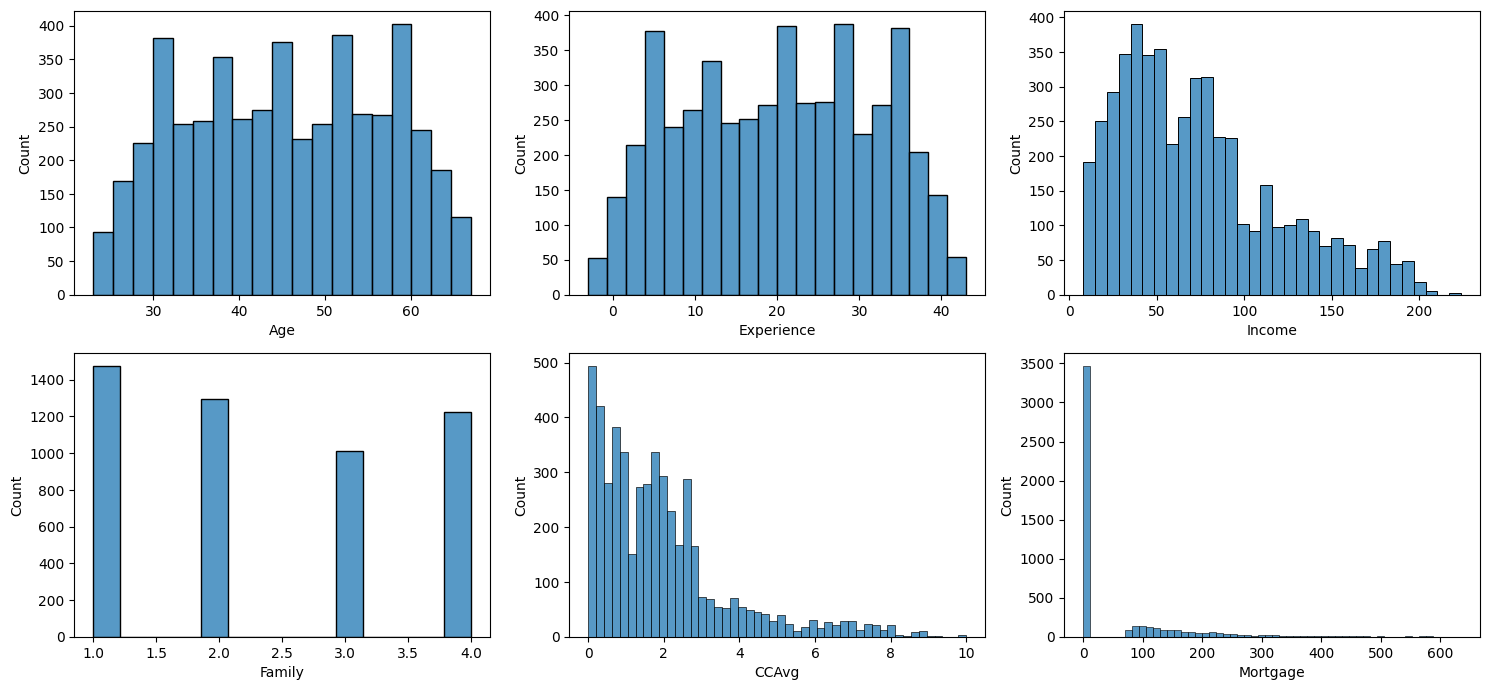

In [17]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
num_features = ['Age', 'Experience',	'Income',	'Family',	'CCAvg', 'Mortgage']

# plotting the histogram for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

**Insights**

* Both Age and Experience show a symmetrical distribution with many modes
* Income is skewed to the right with most earning under 90k
* CCAvg is heavily skewed to the right suggesting outliers on the high spending side
* Mortgage is the most right skewed with the concentration of mortgages at 50k



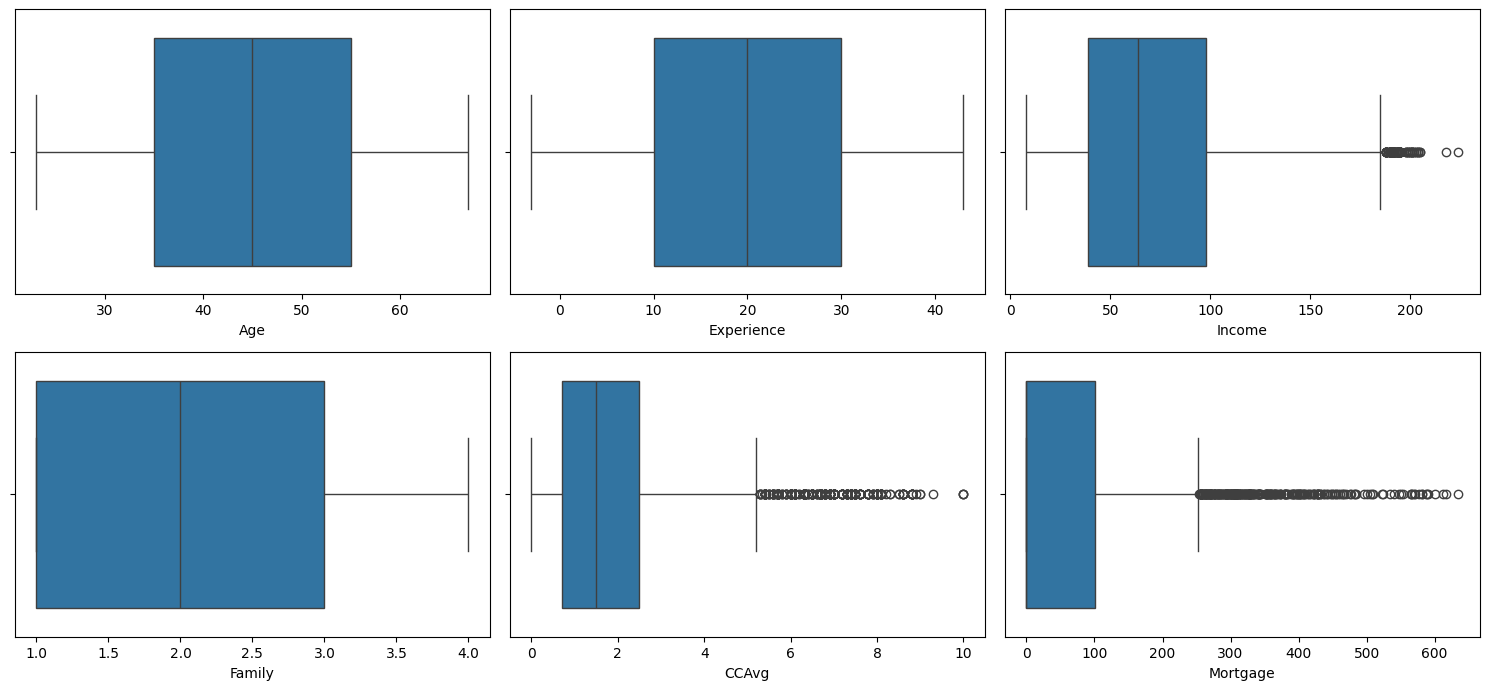

In [18]:
# defining the figure size
plt.figure(figsize=(15, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();    # to add spacing between plots

**Insights**

* Again Age and Experience have a similar distribution with no outliers
* Income is right skewed with outliers
* CCAvg and Mortgage also right skewed with many outliers present, it can be noted that higher income will mean higher spending on both credit cards and mortgages so these may be normal

#### Category Analysis

<Figure size 1500x1000 with 0 Axes>

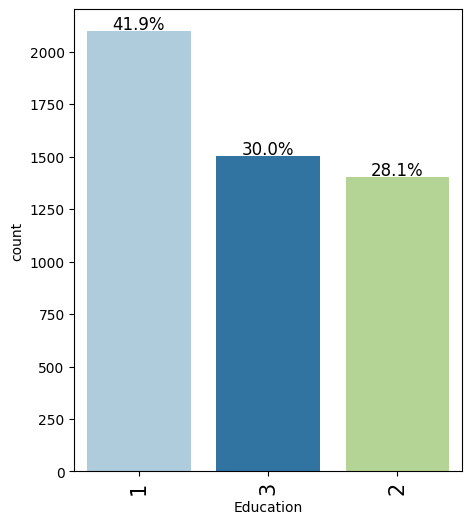

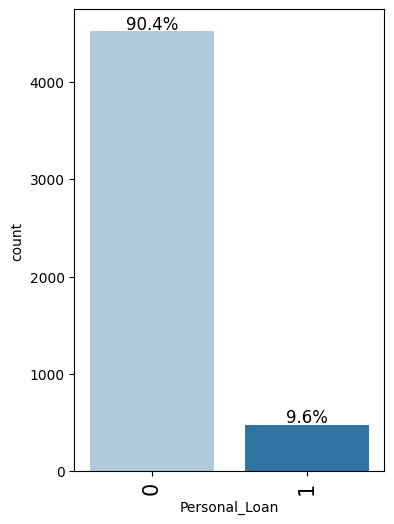

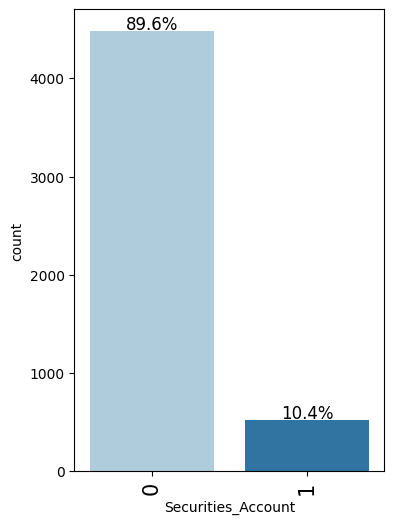

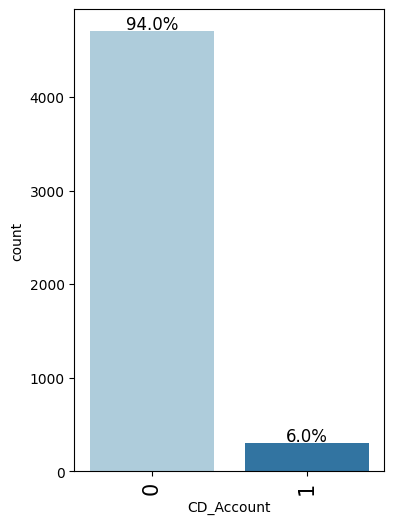

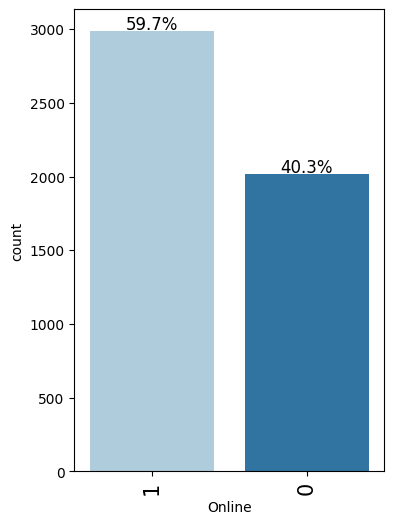

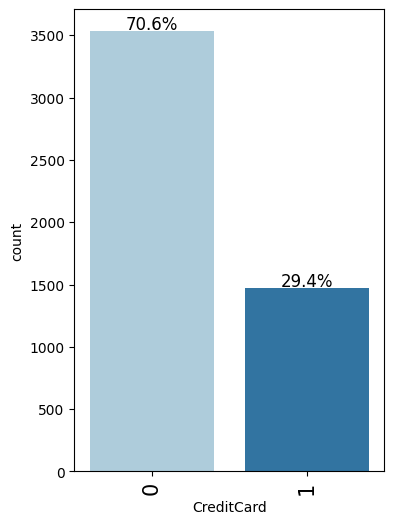

<Figure size 640x480 with 0 Axes>

In [19]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of categorical features to plot
cat_features = ['Education',	'Personal_Loan',	'Securities_Account',	'CD_Account',	'Online',	'CreditCard']

# plotting the countplot for each numerical feature
for i, feature in enumerate(cat_features):
    #plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    labeled_barplot(data, feature, perc=True)   # plot the countplot

plt.tight_layout();   # to add spacing between plots

**Insights**

* 42% have just a Undergraduate degree
* 9.6% of customers purchased a Personal Loan
* 10.4% of customers have a securities account
* E6% of customers have a certificate of deposit account
* 59.7% of customers use online banking
* 71% of customers do not have a credit card with another bank

### Bivariate Analysis

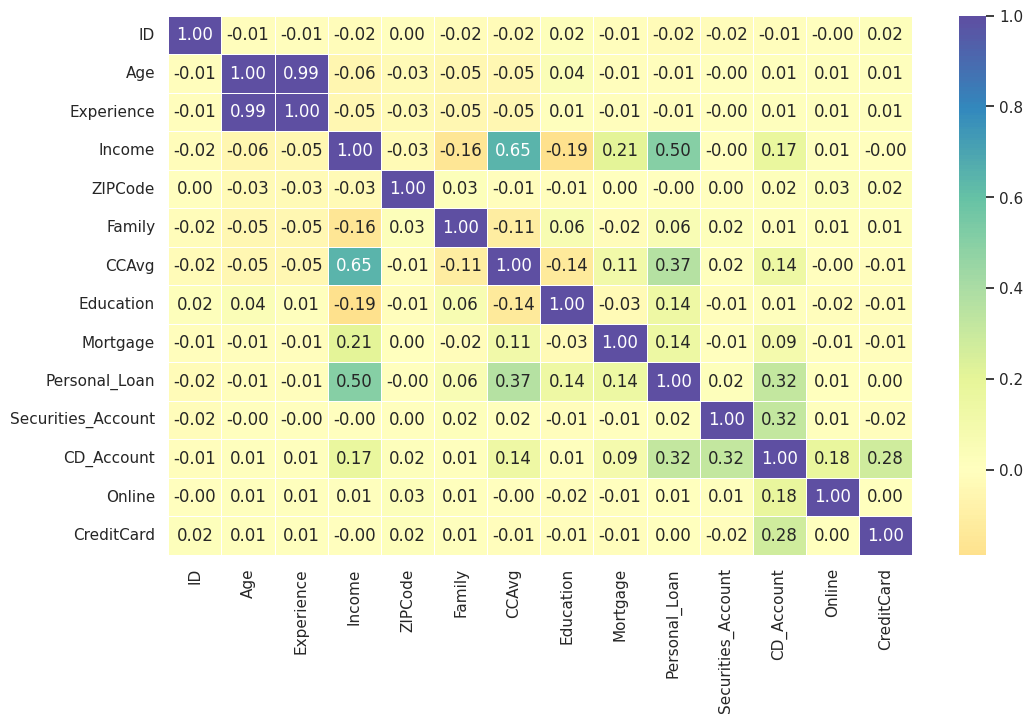

In [20]:
# defining the size of the plot
plt.figure(figsize=(12, 7))

# plotting the heatmap for correlation
category_columns = ['Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education']
data[category_columns] = data[category_columns].astype('float')

sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cmap="Spectral",
    fmt="0.2f",
)
plt.show()

* We can see a strong positive correlation between income and credit card spending, as well as a slight positive correlation with income and mortgages
* Income also has a week negative correlation to Family and Education
* Age and Experience are 99% correlated so will be removing one from the dataset
* Income CCAvg and CD Account also have a strong positive correlation with Personal Loan. Education and Mortgage also have a weaker positive correlation.
* CD Account is positively correlated to Secrurities Account, Online, and CreditCard

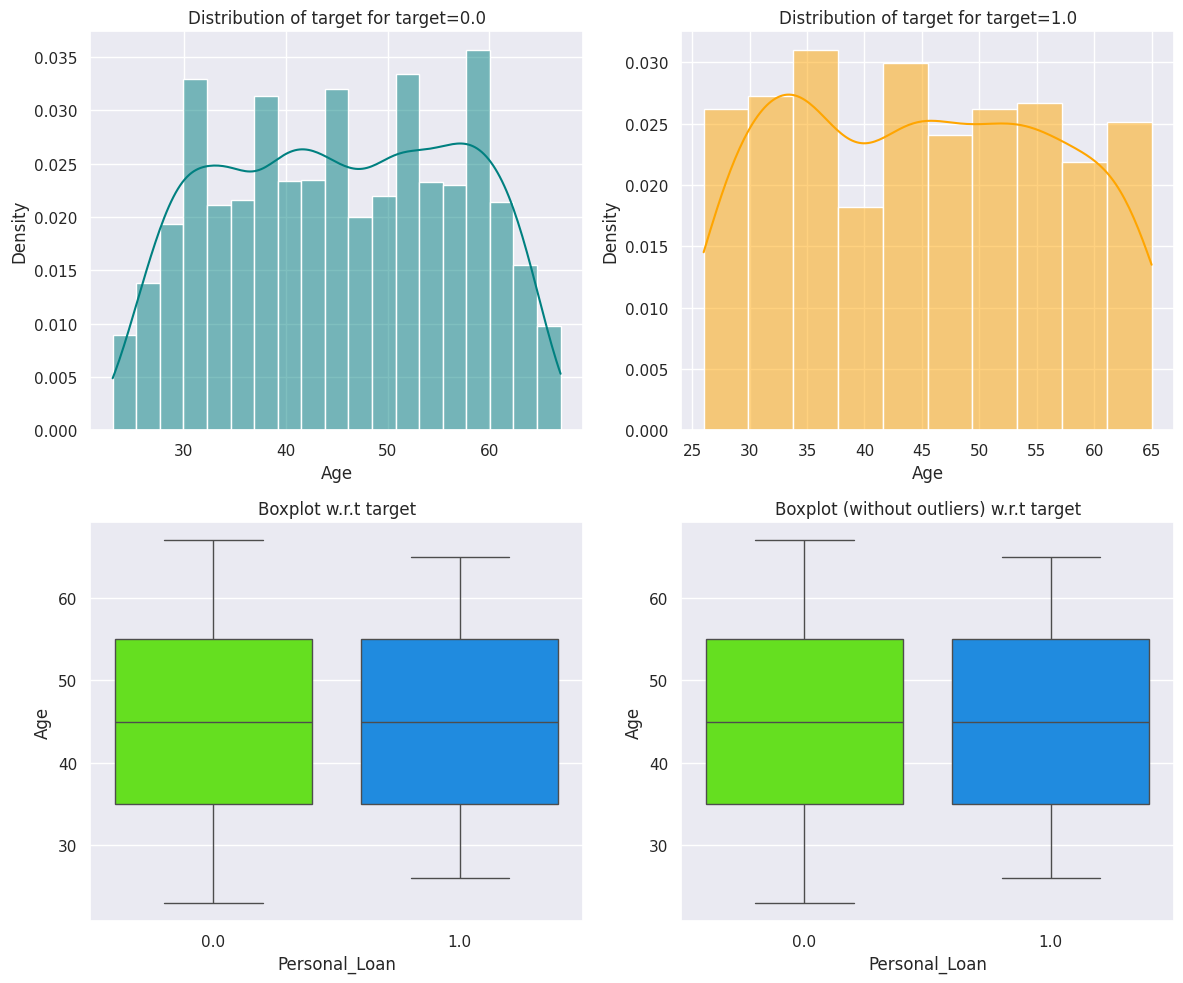

In [21]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

* Nearly the same age distributions for those who do and don't purchase a loan
* We can see that Age does not impact customers decision to purchase a loan

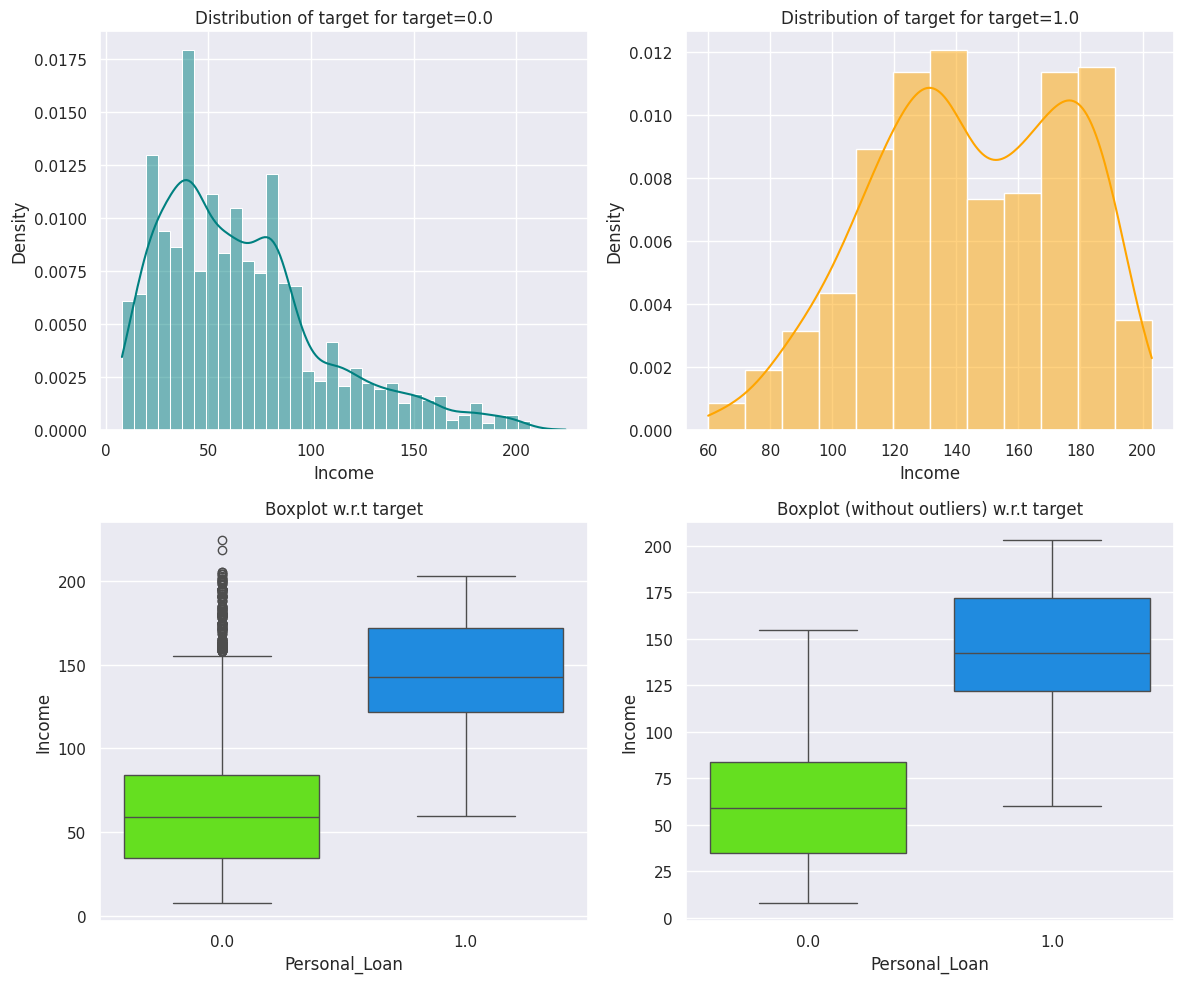

In [22]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

* Those with a higher income are more likely to secure a personal loan
* The median income for those who purchased a personal loan is around 130k
* There are outliers with a high income who didn't secure a loan

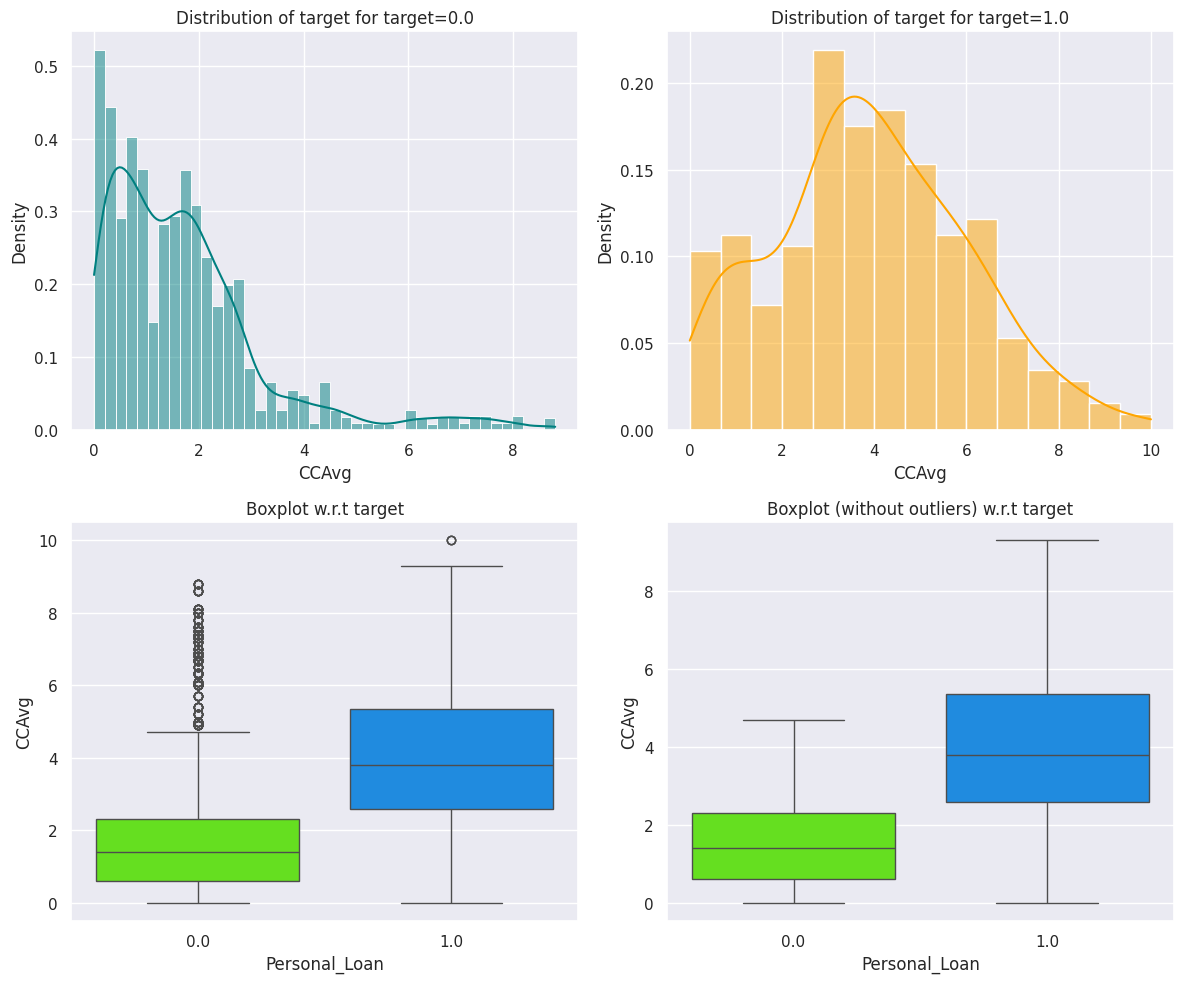

In [23]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

* Those with a higher credit card spending are most likely to secure a personal loan
*  The median credit spend for those with a personal loan is nearly twice as high as those without a loan
*  There are outliers who do spend a lot on their credit card but didn't secure a loan

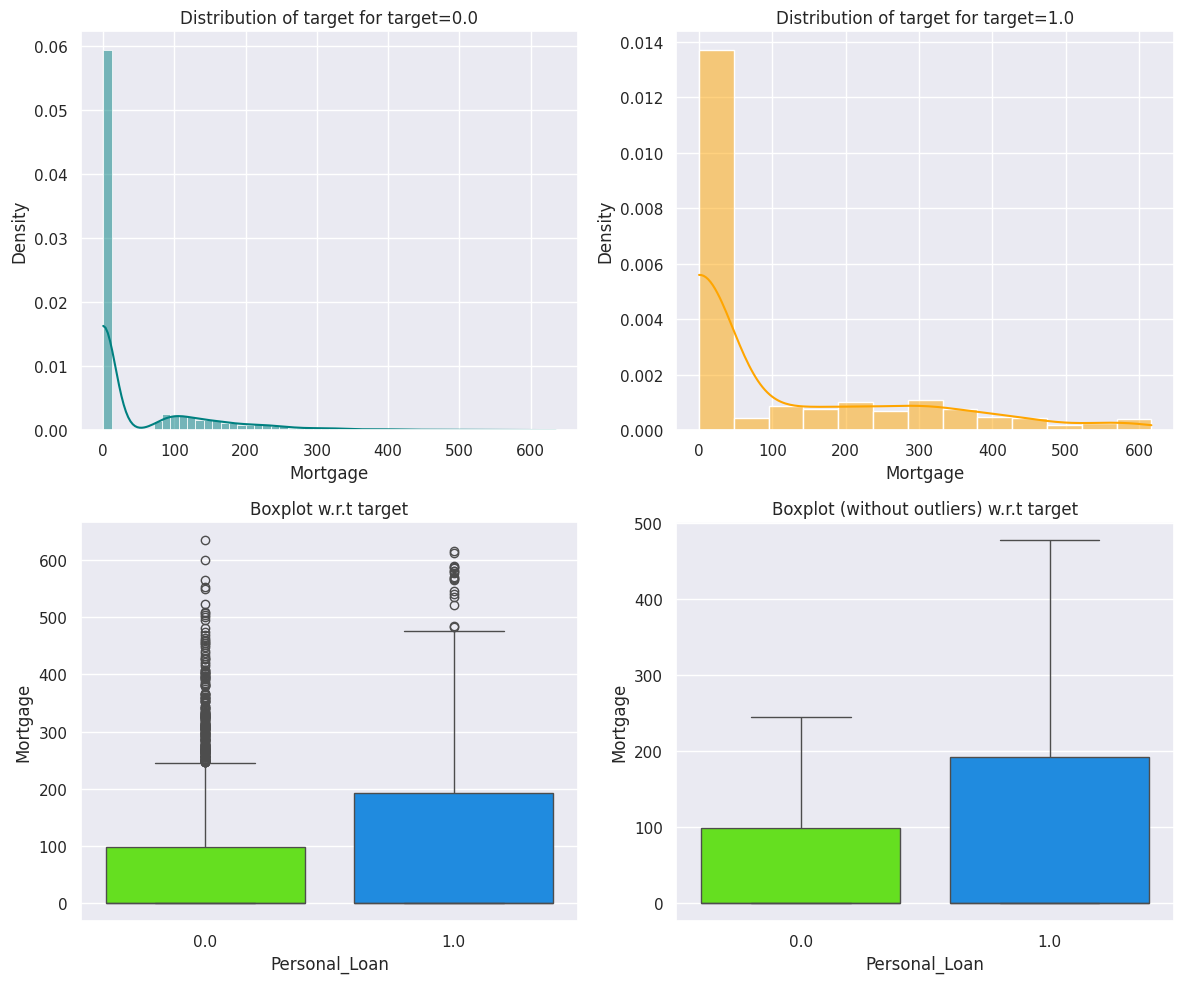

In [24]:
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

* Nearly the same mortgage distribution for those with and without a personal loan
* Typically those with a higher mortgage are more likely to purchase a personal loan, however there are outliers with high mortgages who do not.

Personal_Loan   0.0  1.0   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


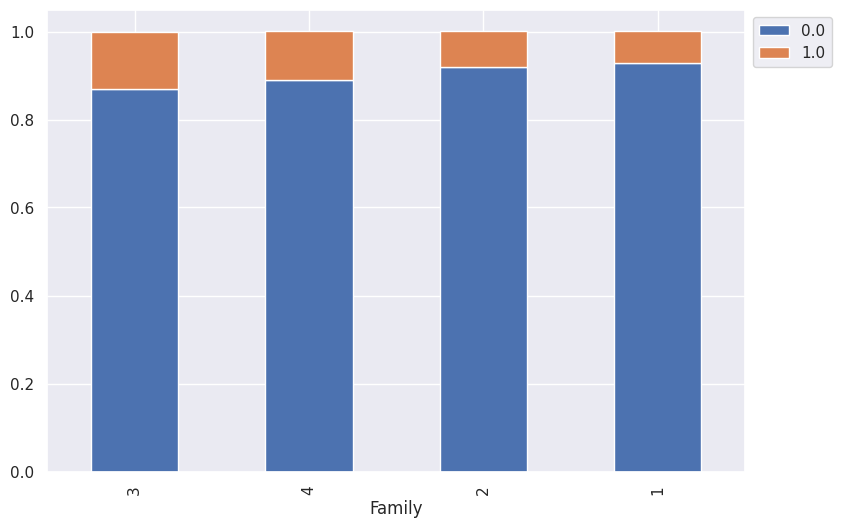

In [25]:
stacked_barplot(data, 'Family', 'Personal_Loan')

* Those with 3 members in their family tend to purchase a personal loan the most with 1 family member families being the least.
* However it is only about 10% of those who do purchase a loan

Personal_Loan   0.0  1.0   All
Education                     
All            4520  480  5000
3.0            1296  205  1501
2.0            1221  182  1403
1.0            2003   93  2096
------------------------------------------------------------------------------------------------------------------------


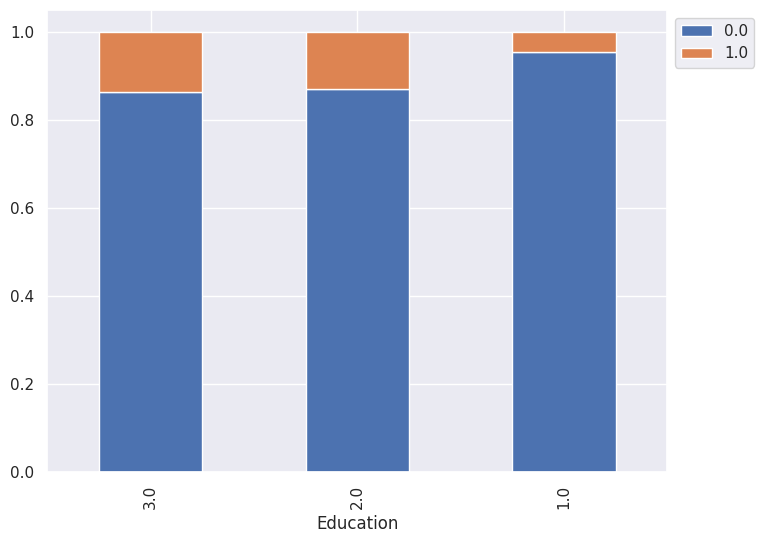

In [26]:
stacked_barplot(data, 'Education', 'Personal_Loan')

* Those with PhD's/Professional degrees and Masters degrees tend to purchase personal loans while those with Undergrad only do not.
* However it is only about 10% of those with PhD's and Masters.

Personal_Loan        0.0  1.0   All
Securities_Account                 
All                 4520  480  5000
0.0                 4058  420  4478
1.0                  462   60   522
------------------------------------------------------------------------------------------------------------------------


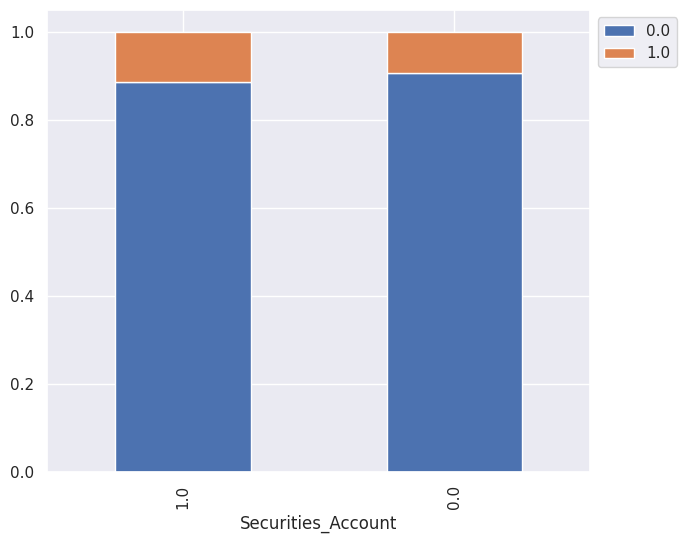

In [27]:
stacked_barplot(data, 'Securities_Account', 'Personal_Loan')

* Equal distribution between those with and without a securities account who purchased a loan

Personal_Loan   0.0  1.0   All
CD_Account                    
All            4520  480  5000
0.0            4358  340  4698
1.0             162  140   302
------------------------------------------------------------------------------------------------------------------------


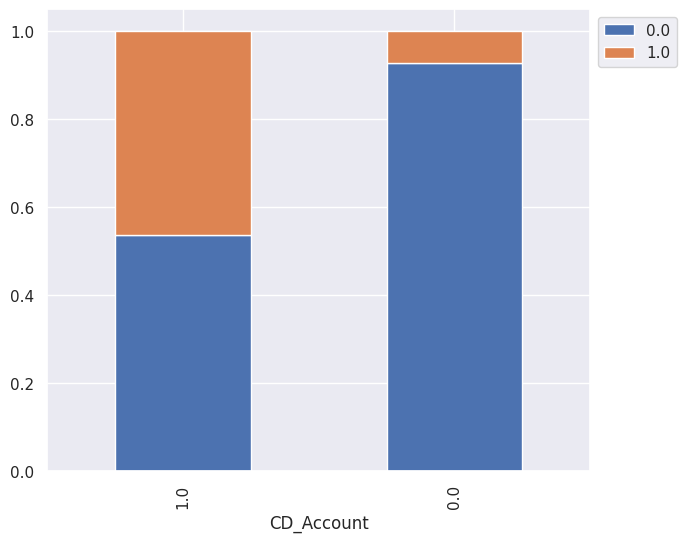

In [28]:
stacked_barplot(data, 'CD_Account', 'Personal_Loan')

* Nearly 50% of those with a CD Account purchased a personal loan, while less then 10% without one did.

Personal_Loan   0.0  1.0   All
Online                        
All            4520  480  5000
1.0            2693  291  2984
0.0            1827  189  2016
------------------------------------------------------------------------------------------------------------------------


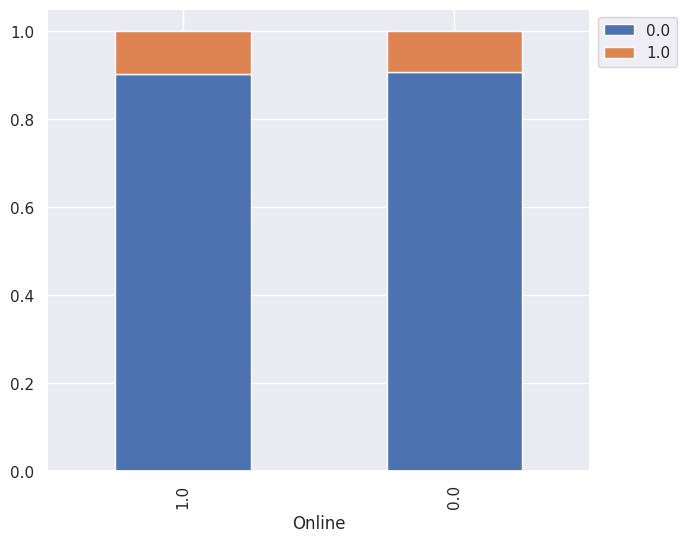

In [29]:
stacked_barplot(data, 'Online', 'Personal_Loan')

* Same distribution of those who bank online and do not

Personal_Loan   0.0  1.0   All
CreditCard                    
All            4520  480  5000
0.0            3193  337  3530
1.0            1327  143  1470
------------------------------------------------------------------------------------------------------------------------


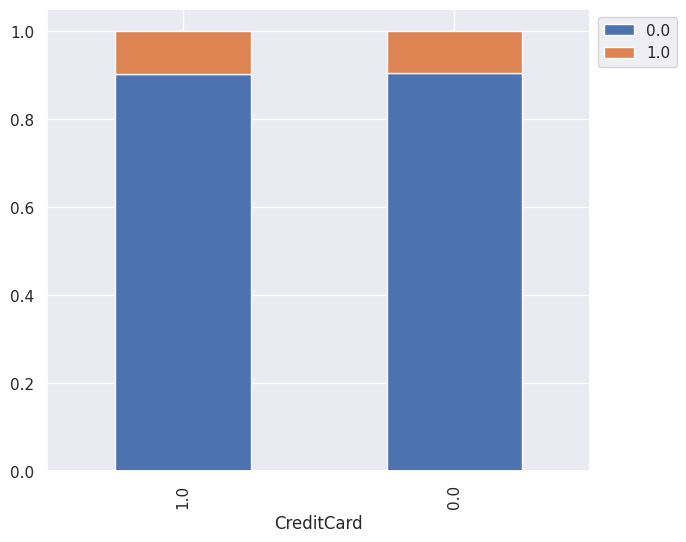

In [30]:
stacked_barplot(data, 'CreditCard', 'Personal_Loan')

* Same distribution of those who own credit cards and those who do not

<Figure size 1200x800 with 0 Axes>

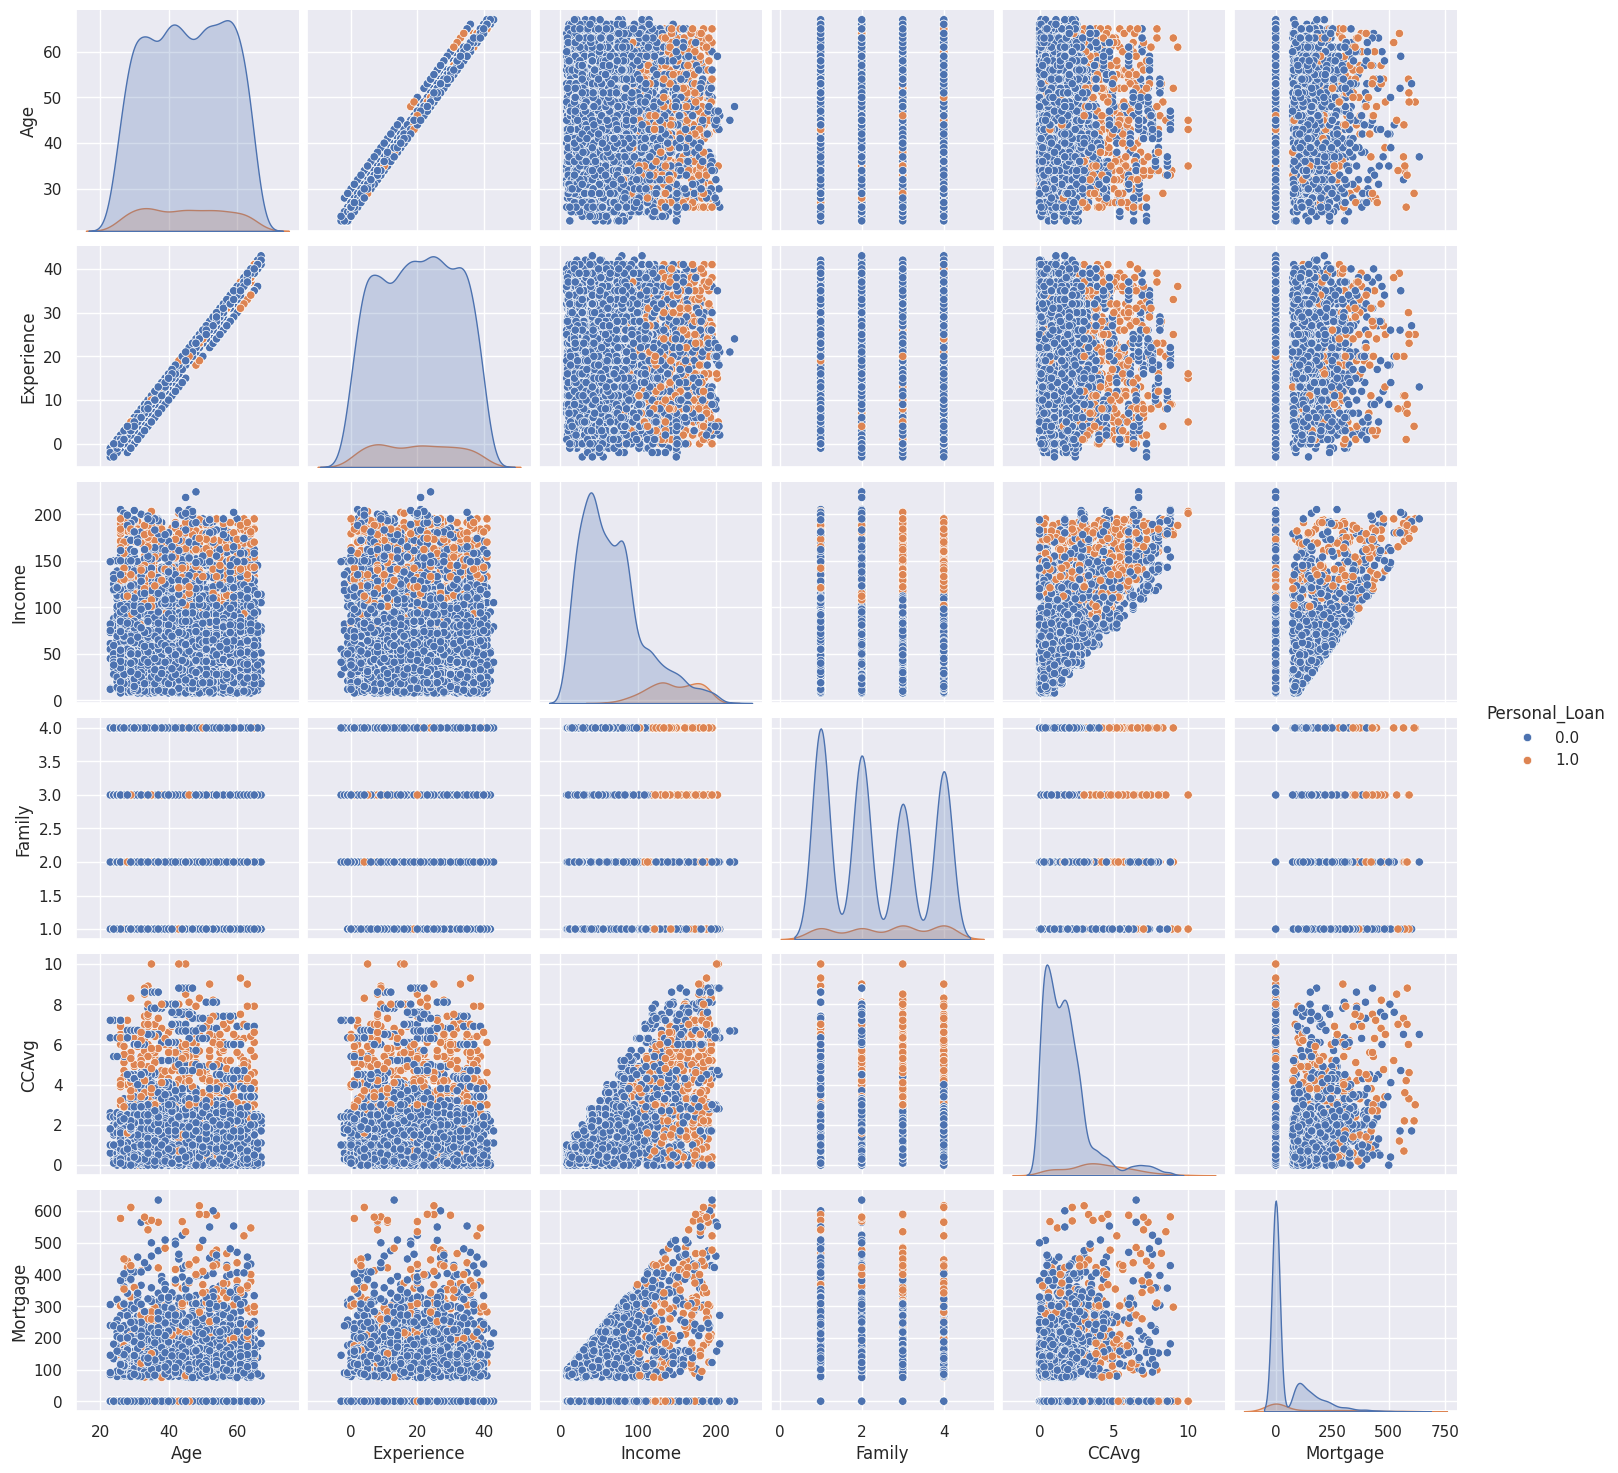

In [31]:
# Scatter plot matrix
plt.figure(figsize=(12, 8))
sns.pairplot(data, vars=num_features, hue='Personal_Loan', diag_kind='kde');

* We can that almost all who purchased a loan, made over 100k
* Those with higher CCAvg spending, purchased a loan. However even those with low spending, if they made over 100k income, they purchased a loan.
* Of those that made 100k, mostly those with 3-4 family members purchased a loan
* Those with higher mortgages typically purchased a loan

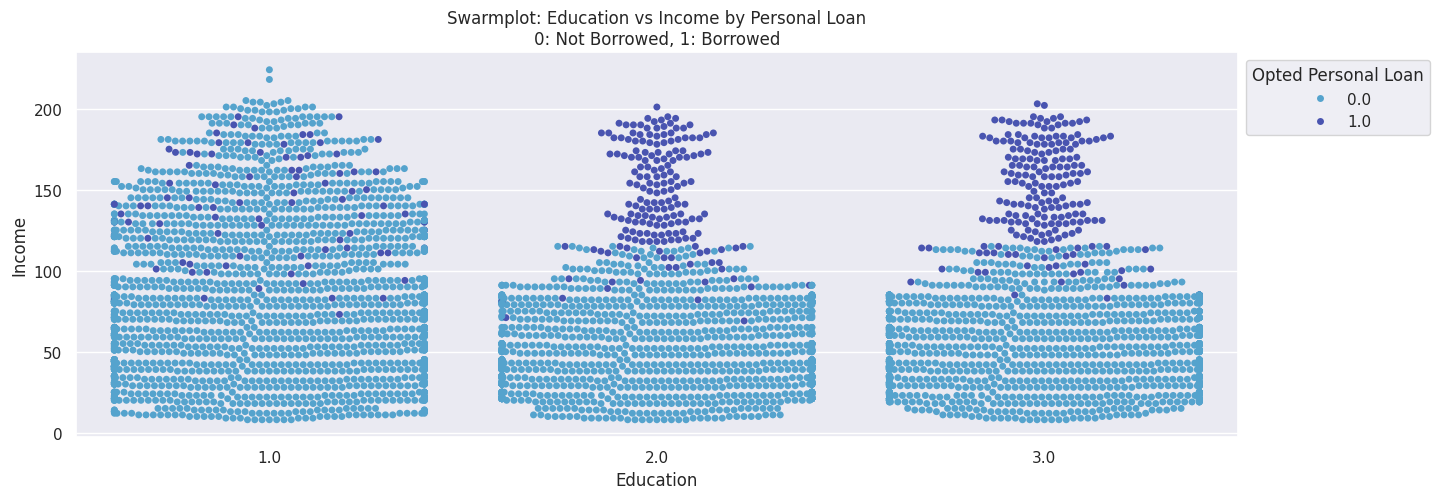

In [32]:
sns.set(palette='icefire')
plt.figure(figsize=(15,5))
sns.swarmplot(data=data, x='Education', y='Income', hue='Personal_Loan').set(title='Swarmplot: Education vs Income by Personal Loan\n0: Not Borrowed, 1: Borrowed');
plt.legend(loc="upper left" ,title="Opted Personal Loan", bbox_to_anchor=(1,1));

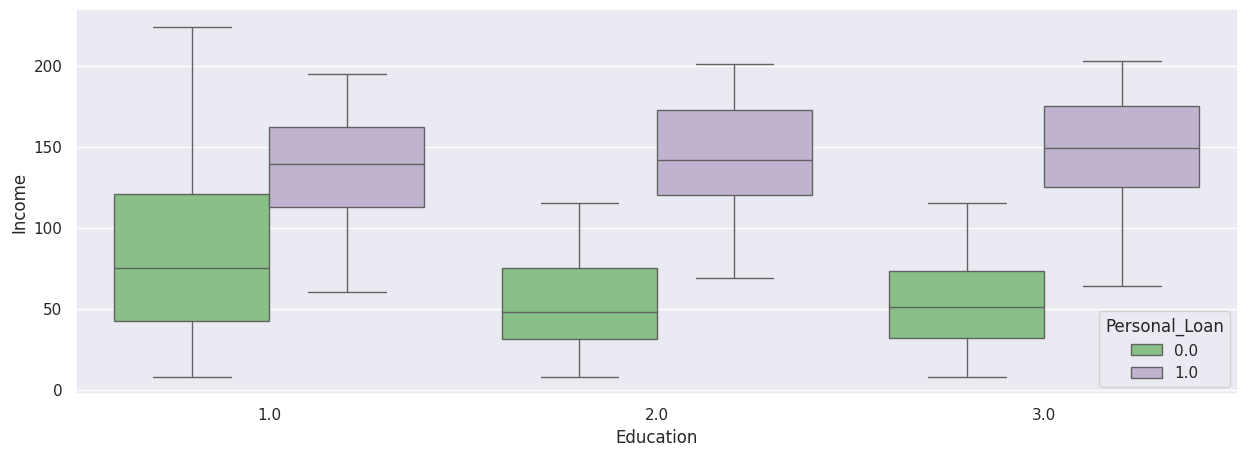

In [33]:
sns.set(palette='Accent')
#Income Vs Education Vs Personal_Loan
plt.figure(figsize=(15,5))
sns.boxplot(data=data,y='Income',x='Education',hue='Personal_Loan')
plt.show()

**Questions:**

* What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

**The distribution of mortgages is highly rightly skewed with the concentration around 50k. There is a large number of outliers but for a state like California where home prices vary significantly this can be expected. Typically those with a higher mortgage tend to purchase a personal loan**

* How many customers have credit cards?

**3,530 customers have credit cards with other banks**

* What are the attributes that have a strong correlation with the target attribute (personal loan)?

**Income, Family CCAvg Education and CD Account have strong correlations with the target attribute.**

* How does a customer's interest in purchasing a loan vary with their age?

**There is a growing interest in between ages 25-35 years.**

* How does a customer's interest in purchasing a loan vary with their education?

**Those with a PhD/Professional degree have a higher chance of purchasing a loan along with those with a Masters degree, however slightly less likely. Those with just an Undergrad degree are very unlikely to purchase a personal loan.**

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [34]:
category_columns = ['Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education']
data[category_columns] = data[category_columns].astype('object')

Lets convert the category columns into objects

In [35]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education              object
Mortgage                int64
Personal_Loan          object
Securities_Account     object
CD_Account             object
Online                 object
CreditCard             object
dtype: object

In [36]:
data.drop(['ID', 'Experience'], inplace=True, axis=1)

* We don't need ID so we can go ahead and drop it
* We can also drop Experience since it is 99% correlated with Age

In [37]:
data.rename(columns={'ZIPCode': 'Zip_Code', 'CreditCard': 'Credit_Card'}, inplace=True)

Let's rename ZIPCode and CreditCard so it's consistent with the other column titles

In [38]:
data['Zip_Code'].nunique()

467

There are 467 unique zip codes which would create too many dummy variables. Let's reduce this by converting the zip codes into counties using uszipcode

In [39]:
#Function that takes a zip code and returns their respective county

def get_county(zip):
  try:
    return search.by_zipcode(zip).county
  except AttributeError:
    return np.nan

In [40]:
data['County'] = data['Zip_Code'].apply(get_county)

We can create a new coloumn called 'County' for the zip codes county

In [41]:
data.County.nunique()

38

You can see that there are now 38 counties from the 467 zip codes. Let's see if we can condense this even further by mapping the county to their respective region.

In [42]:
data[data['County'].isnull()]['Zip_Code'].unique()

array([92717, 93077, 92634, 96651])

Before we do that, let's check to see if any zip codes don't have a county.

In [43]:
county_dict = { 92717: 'Orange County', 93077: '93077',92634 : 'Orange County', 96651 : 'El Dorado County'}

for i in county_dict.keys():
  data.loc[data['Zip_Code'] == i, 'County'] = county_dict[i]

In order to map the remaining zip codes, we'll need to check online for them and map them accordingly.

In [44]:
county_region = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'San Diego - Imperial',
'Santa Clara County':'San Francisco Bay Area',
'Alameda County':'San Francisco Bay Area',
'Orange County':'Orange County Area',
'San Francisco County':'San Francisco Bay Area',
'San Mateo County':'San Francisco Bay Area',
'Sacramento County':'Superior California',
'Santa Barbara County':'Central Coast',
'Yolo County':'Superior California',
'Monterey County':'Central Coast',
'Ventura County':'Central Coast',
'San Bernardino County':'Inland Empire',
'Contra Costa County':'San Francisco Bay Area',
'Santa Cruz County':'Central Coast',
'Riverside County':'Inland Empire',
'Kern County':'Southern San Joaquin Valley',
'Marin County':'San Francisco Bay Area',
'San Luis Obispo County':'Central Coast',
'Solano County':'San Francisco Bay Area',
'Humboldt County':'North Coast',
'Sonoma County':'North Coast',
'Fresno County':'Southern San Joaquin Valley',
'Placer County':'Superior California',
'Butte County':'Superior California',
'Shasta County':'Superior California',
'El Dorado County':'Superior California',
'Stanislaus County':'Northern San Joaquin Valley',
'San Benito County':'Central Coast',
'San Joaquin County':'Northern San Joaquin Valley',
'Mendocino County':'North Coast',
'Tuolumne County':'Northern San Joaquin Valley',
'Siskiyou County':'Superior California',
'Trinity County':'North Coast',
'Merced County':'Northern San Joaquin Valley',
'Lake County':'North Coast',
'Napa County':'North Coast',
'Imperial County':'San Diego - Imperial',
'93077':'Central Coast', # Since 93065 and 93101 zip codes are in Central Coast
}

Now we can map the counties to their region using https://census.ca.gov/regions/

In [45]:
data['Region'] = data['County'].map(county_region).astype('object')

In [46]:
data.Region.nunique()

10

We now have 10 regions to work with, since this will still provide a location with less variables, we can drop zip code and county

In [47]:
data.drop(['Zip_Code', 'County'], inplace=True, axis=1)

In [48]:
data.groupby('Region')['Personal_Loan'].sum().sort_values(ascending=False)

Region
San Francisco Bay Area         167.0
Los Angeles Region             111.0
San Diego - Imperial            59.0
Central Coast                   50.0
Orange County Area              33.0
Superior California             31.0
Inland Empire                    9.0
North Coast                      9.0
Southern San Joaquin Valley      9.0
Northern San Joaquin Valley      2.0
Name: Personal_Loan, dtype: object

Personal_Loan                 0.0  1.0   All
Region                                      
All                          4520  480  5000
San Francisco Bay Area       1529  167  1696
Los Angeles Region            984  111  1095
San Diego - Imperial          512   59   571
Central Coast                 462   50   512
Orange County Area            333   33   366
Superior California           374   31   405
Inland Empire                 148    9   157
North Coast                    70    9    79
Southern San Joaquin Valley    71    9    80
Northern San Joaquin Valley    37    2    39
------------------------------------------------------------------------------------------------------------------------


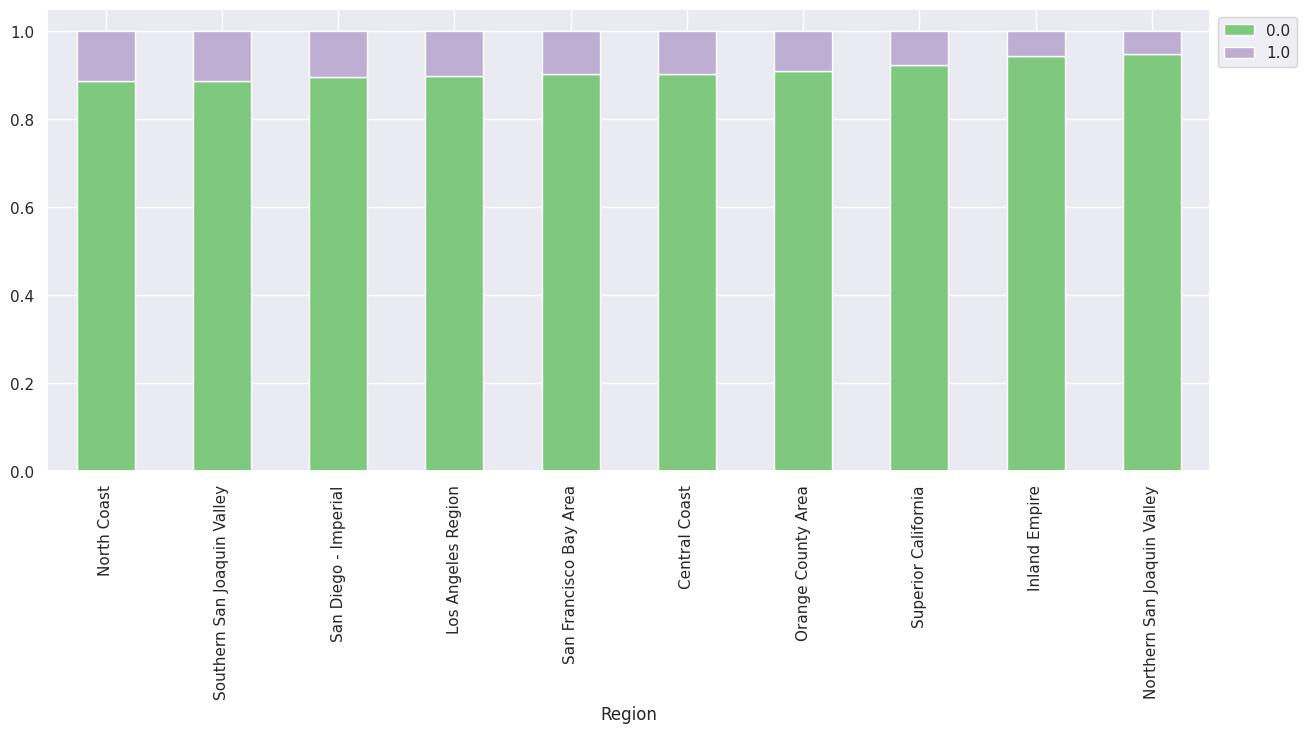

In [49]:
stacked_barplot(data, 'Region', 'Personal_Loan')

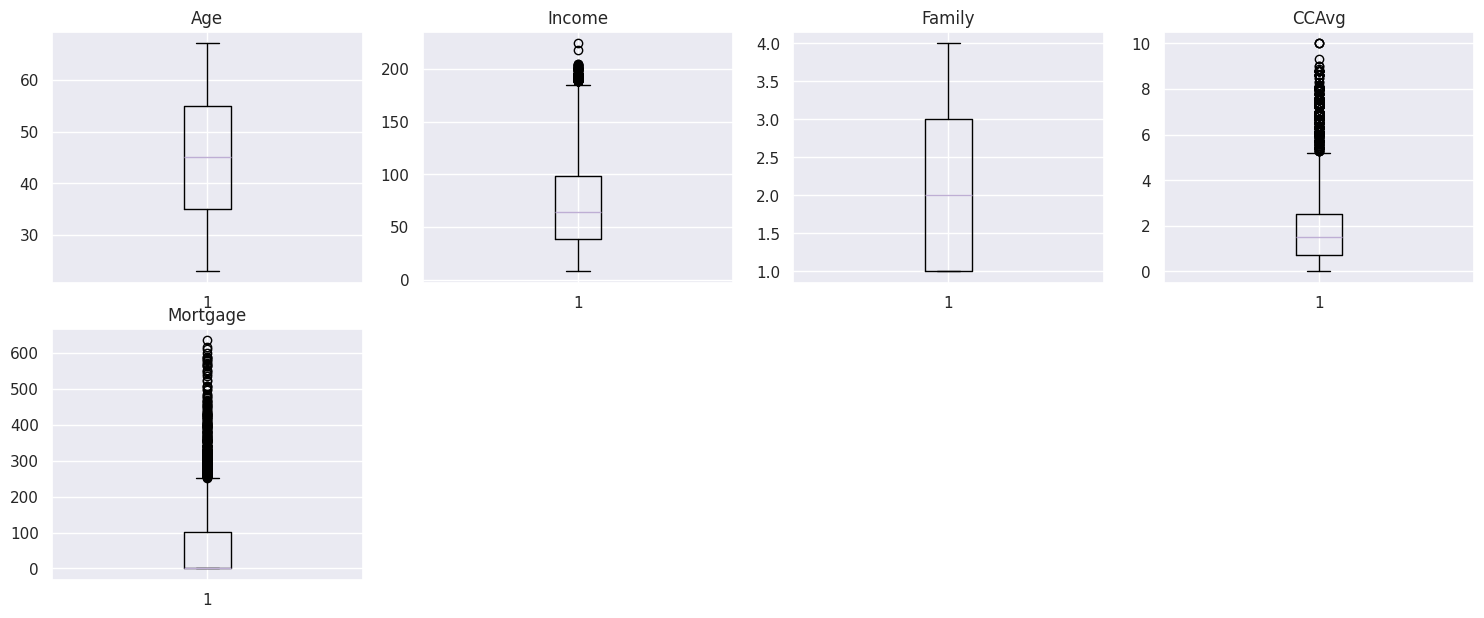

In [50]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

We can also go ahead and treat the outliers

In [51]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker)
    # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whisker will be assigned value of upper_Whisker
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)

    return data

In [52]:
outlier_features = ['Income', 'CCAvg', 'Mortgage']
data = treat_outliers_all(data, outlier_features)

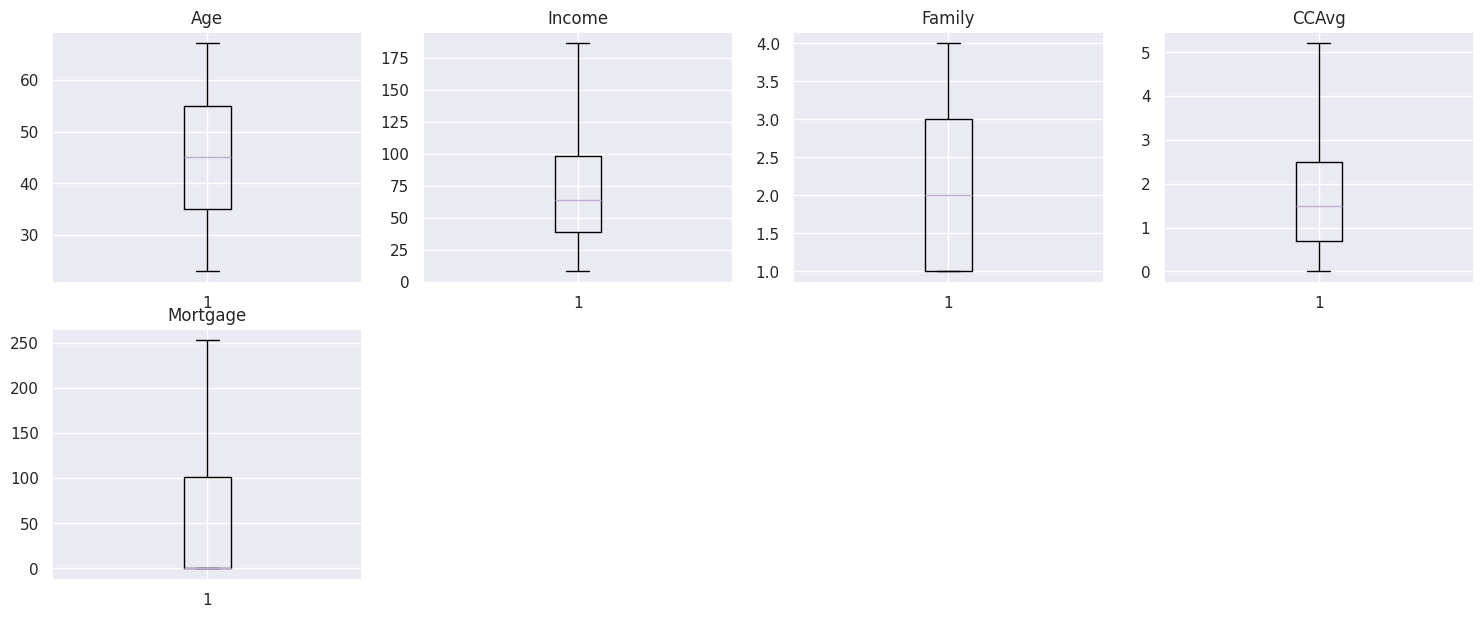

In [53]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [54]:
data.head()

Age  Income  Family  CCAvg Education  Mortgage Personal_Loan  \
0   25    49.0       4    1.6       1.0       0.0           0.0   
1   45    34.0       3    1.5       1.0       0.0           0.0   
2   39    11.0       1    1.0       1.0       0.0           0.0   
3   35   100.0       1    2.7       2.0       0.0           0.0   
4   35    45.0       4    1.0       2.0       0.0           0.0   

  Securities_Account CD_Account Online Credit_Card                  Region  
0                1.0        0.0    0.0         0.0      Los Angeles Region  
1                1.0        0.0    0.0         0.0      Los Angeles Region  
2                0.0        0.0    0.0         0.0  San Francisco Bay Area  
3                0.0        0.0    0.0         0.0  San Francisco Bay Area  
4                0.0        0.0    0.0         1.0      Los Angeles Region

In [55]:
data.describe(include='all').T

count unique                     top    freq      mean  \
Age                 5000.0    NaN                     NaN     NaN   45.3384   
Income              5000.0    NaN                     NaN     NaN   73.6174   
Family              5000.0    NaN                     NaN     NaN    2.3964   
CCAvg               5000.0    NaN                     NaN     NaN  1.831338   
Education           5000.0    3.0                     1.0  2096.0       NaN   
Mortgage            5000.0    NaN                     NaN     NaN   50.4947   
Personal_Loan       5000.0    2.0                     0.0  4520.0       NaN   
Securities_Account  5000.0    2.0                     0.0  4478.0       NaN   
CD_Account          5000.0    2.0                     0.0  4698.0       NaN   
Online              5000.0    2.0                     1.0  2984.0       NaN   
Credit_Card         5000.0    2.0                     0.0  3530.0       NaN   
Region                5000     10  San Francisco Bay Area    1696       NaN   

                          std   min   25%   50%    75%    max  
Age                 11.463166  23.0  35.0  45.0   55.0   67.0  
Income              45.626122   8.0  39.0  64.0   98.0  186.5  
Family               1.147663   1.0   1.0   2.0    3.0    4.0  
CCAvg                1.452215   0.0   0.7   1.5    2.5    5.2  
Education                 NaN   NaN   NaN   NaN    NaN    NaN  
Mortgage            83.005401   0.0   0.0   0.0  101.0  252.5  
Personal_Loan             NaN   NaN   NaN   NaN    NaN    NaN  
Securities_Account        NaN   NaN   NaN   NaN    NaN    NaN  
CD_Account                NaN   NaN   NaN   NaN    NaN    NaN  
Online                    NaN   NaN   NaN   NaN    NaN    NaN  
Credit_Card               NaN   NaN   NaN   NaN    NaN    NaN  
Region                    NaN   NaN   NaN   NaN    NaN    NaN

In [56]:
X = data.drop(['Personal_Loan'], axis=1)
Y = data['Personal_Loan']

Y = Y.astype(int)

X = pd.get_dummies(data=X, columns=['Education', 'Region'], drop_first=True)
X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

X.head()

Age  Income  Family  CCAvg  Mortgage  Securities_Account  CD_Account  \
0  25.0    49.0     4.0    1.6       0.0                 1.0         0.0   
1  45.0    34.0     3.0    1.5       0.0                 1.0         0.0   
2  39.0    11.0     1.0    1.0       0.0                 0.0         0.0   
3  35.0   100.0     1.0    2.7       0.0                 0.0         0.0   
4  35.0    45.0     4.0    1.0       0.0                 0.0         0.0   

   Online  Credit_Card  Education_2.0  Education_3.0  Region_Inland Empire  \
0     0.0          0.0            0.0            0.0                   0.0   
1     0.0          0.0            0.0            0.0                   0.0   
2     0.0          0.0            0.0            0.0                   0.0   
3     0.0          0.0            1.0            0.0                   0.0   
4     0.0          1.0            1.0            0.0                   0.0   

   Region_Los Angeles Region  Region_North Coast  \
0                        1.0                 0.0   
1                        1.0                 0.0   
2                        0.0                 0.0   
3                        0.0                 0.0   
4                        1.0                 0.0   

   Region_Northern San Joaquin Valley  Region_Orange County Area  \
0                                 0.0                        0.0   
1                                 0.0                        0.0   
2                                 0.0                        0.0   
3                                 0.0                        0.0   
4                                 0.0                        0.0   

   Region_San Diego - Imperial  Region_San Francisco Bay Area  \
0                          0.0                            0.0   
1                          0.0                            0.0   
2                          0.0                            1.0   
3                          0.0                            1.0   
4                          0.0                            0.0   

   Region_Southern San Joaquin Valley  Region_Superior California  
0                                 0.0                         0.0  
1                                 0.0                         0.0  
2                                 0.0                         0.0  
3                                 0.0                         0.0  
4                                 0.0                         0.0

Here we've split the training and test data and turned the Education and Region columns into dummy values. The test size used for this case was 30%

In [57]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (3500, 20)
Shape of test set: (1500, 20) 

Percentage of classes in training set:
Personal_Loan
0    90.542857
1     9.457143
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.066667
1     9.933333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

* Predicting a customer will buy a personal loan but in reality, they wont (FN)
* Predicting a customer will not buy a personal loan but in reality, will (FP)

**Which case is more important?**

* If we predict that a customer will buy a personal loan but in reality they don't, then the company will underperform in selling loans
* If we predict that a customer will not buy a personal loan but does, then the company overperforms in selling loans
* It is better to have a sale then not

**How to increase sales?**

The company would want the recall to be maximized, greater the recall score higher the chances of minimizing the False Negatives

### Model Building

In [58]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [59]:
def make_confusion_matrix(model,test_X,y_actual,i,seg,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth

    '''
    y_predict = model.predict(test_X)
    cm=confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ['Actual - Borrowed', 'Actual - Not Borrowed']],
                  columns = [i for i in ['Predicted - Borrowed','Predicted - Not Borrowed']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='', ax=axes[i], cmap='Blues').set(title='Confusion Matrix of {} Set'.format(seg))

In [60]:
model0 = DecisionTreeClassifier(criterion="gini", random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

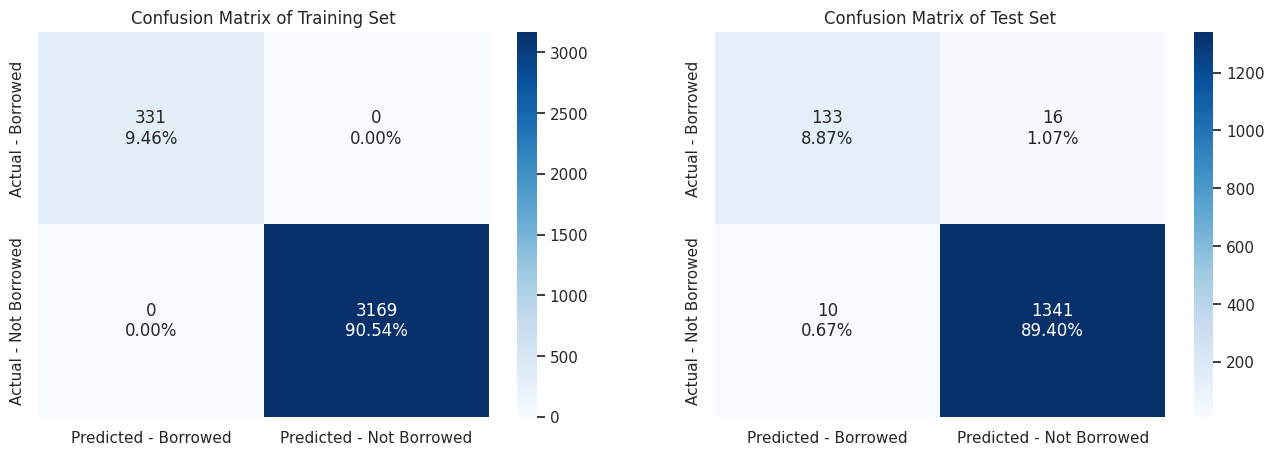

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

In [61]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
make_confusion_matrix(model0, X_train, y_train, i=0, seg='Training')
make_confusion_matrix(model0, X_test, y_test, i=1, seg='Test')

In [62]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [63]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

Accuracy    Recall  Precision        F1
0  0.982667  0.892617    0.93007  0.910959

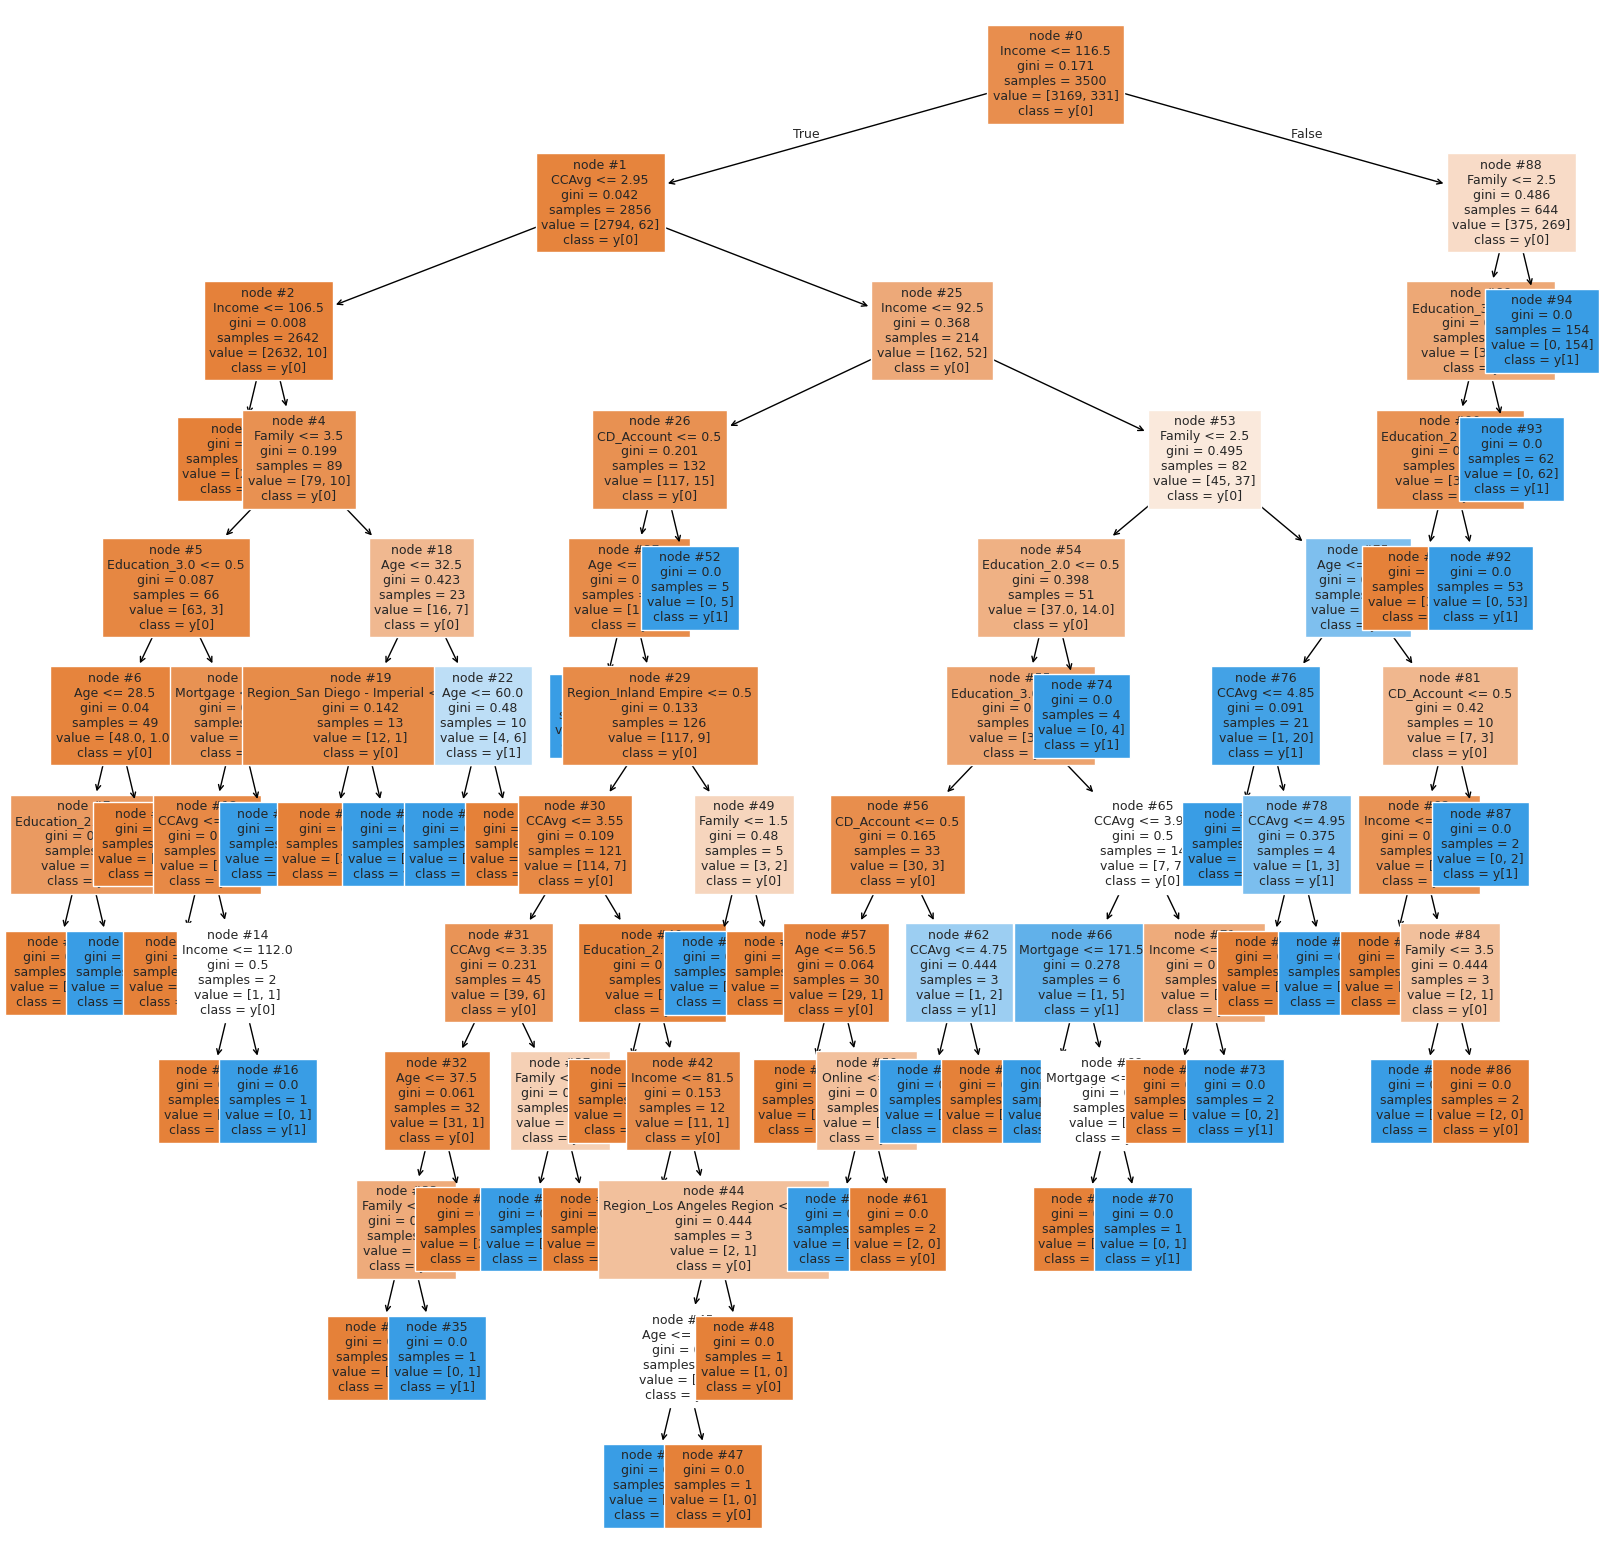

In [64]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    model0,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=True,                 # do not show the ID of each node
    class_names=True,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [65]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

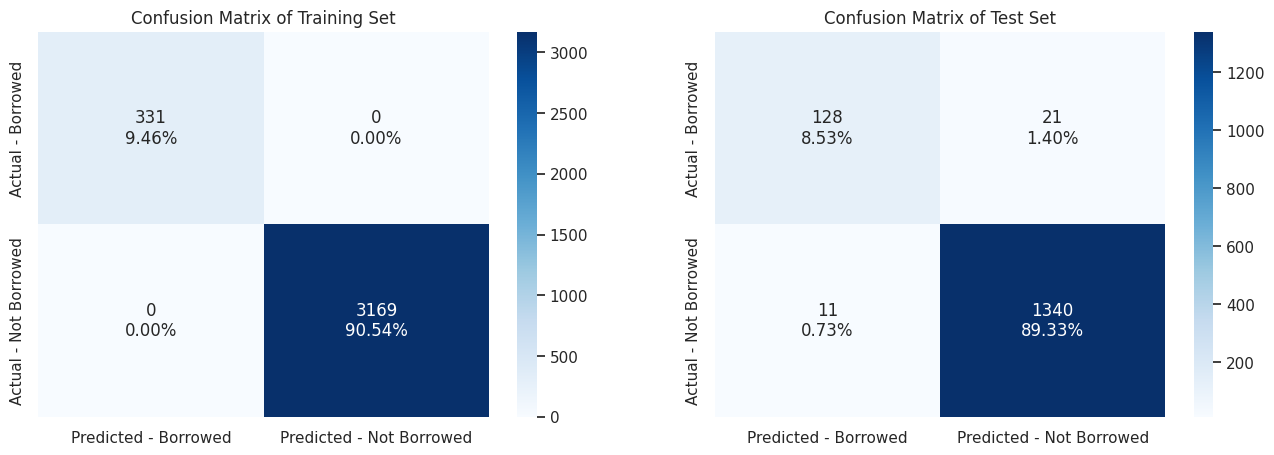

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

In [66]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
make_confusion_matrix(model1, X_train, y_train, i=0, seg='Training')
make_confusion_matrix(model1, X_test, y_test, i=1, seg='Test')

In [67]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [68]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

Accuracy   Recall  Precision        F1
0  0.978667  0.85906   0.920863  0.888889

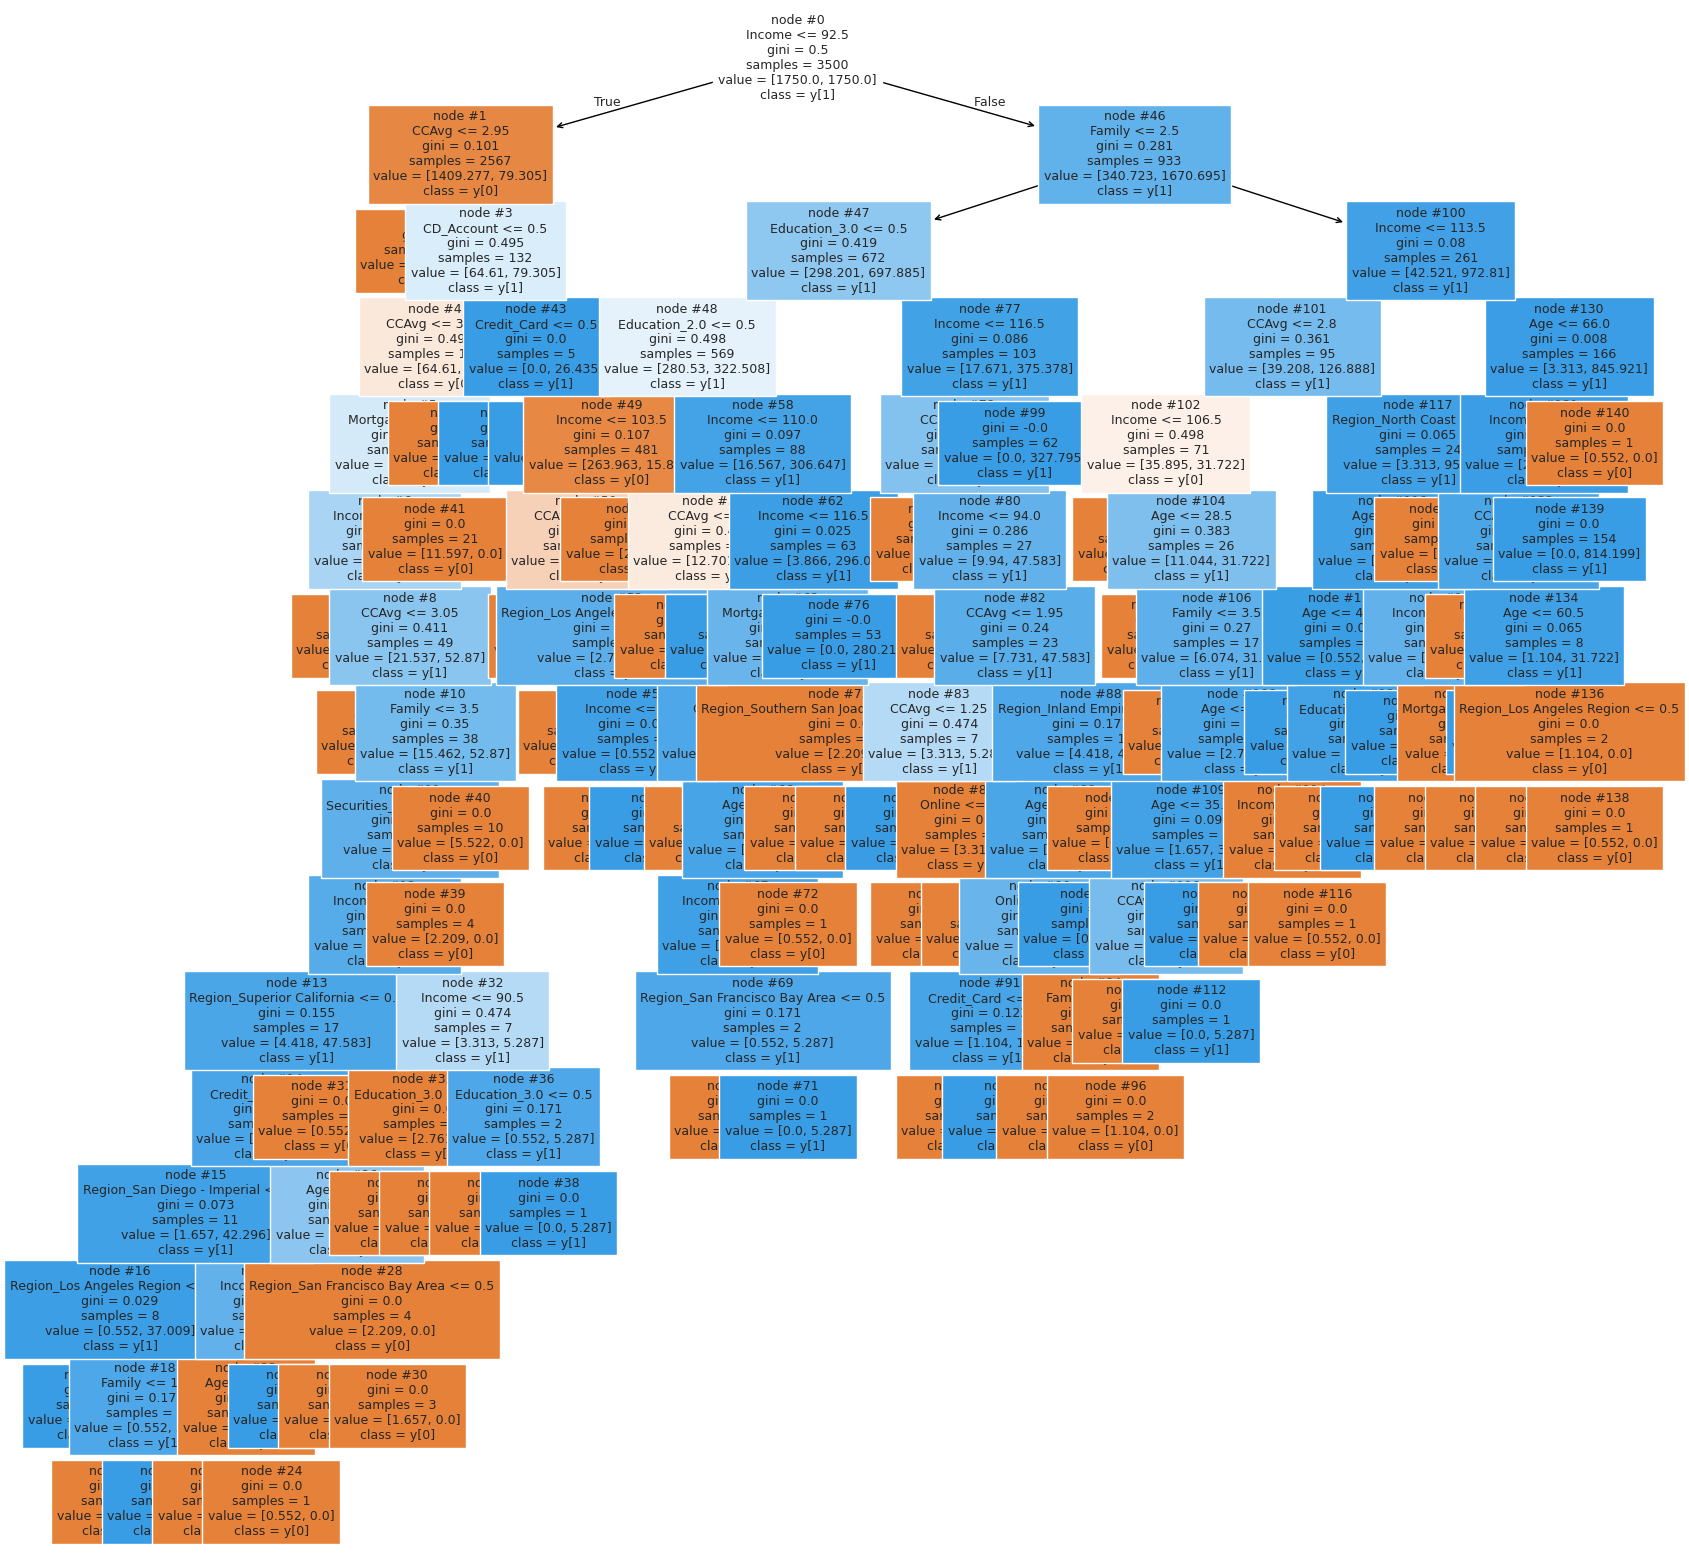

In [69]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    model1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=True,                 # do not show the ID of each node
    class_names=True,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

## Model Performance Improvement

In [70]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                #class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 6
Max leaf nodes: 50
Min samples split: 50
Best test recall score: 0.8657718120805369


In [71]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(6), max_leaf_nodes=50,
                       min_samples_split=50, random_state=42)

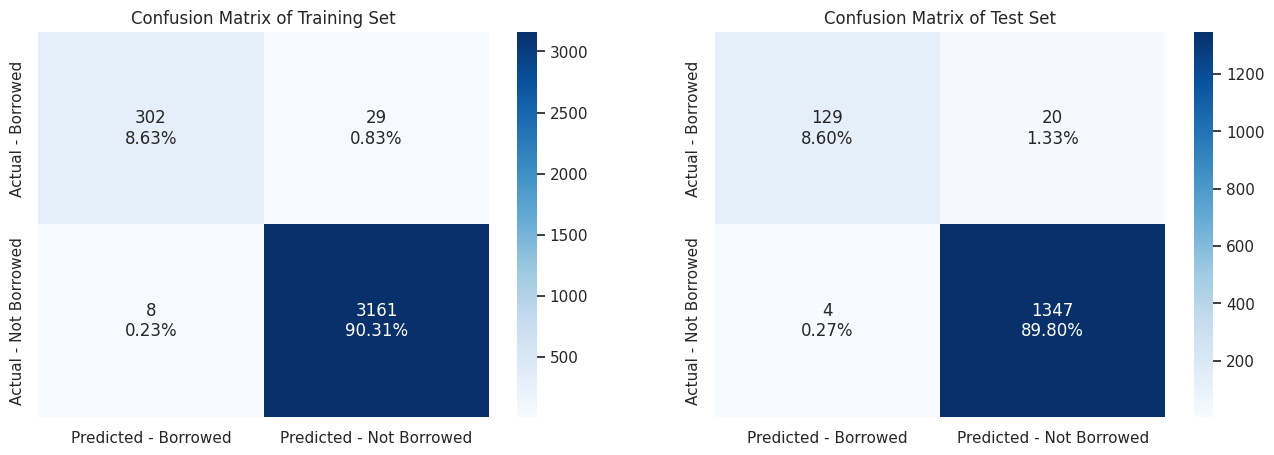

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

In [72]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
make_confusion_matrix(model2, X_train, y_train, i=0, seg='Training')
make_confusion_matrix(model2, X_test, y_test, i=1, seg='Test')

In [73]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.989429  0.912387   0.974194  0.942278

In [74]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0     0.984  0.865772   0.969925  0.914894

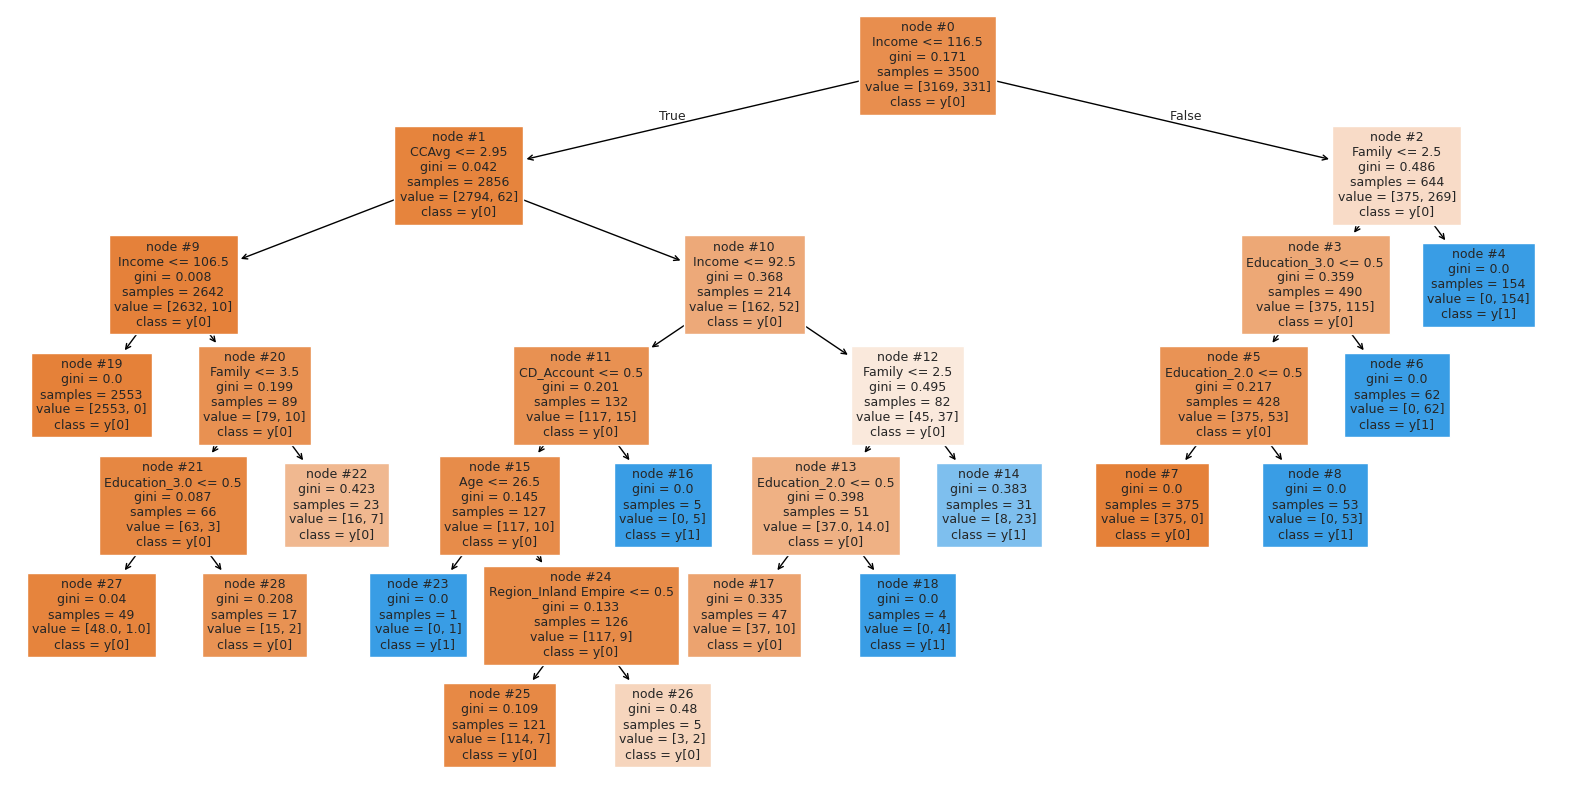

In [75]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [76]:
importances = model2.feature_importances_
importances

array([0.00316273, 0.32998541, 0.27352741, 0.04187896, 0.        ,
       0.        , 0.01509485, 0.        , 0.        , 0.18012946,
       0.15414303, 0.00207816, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

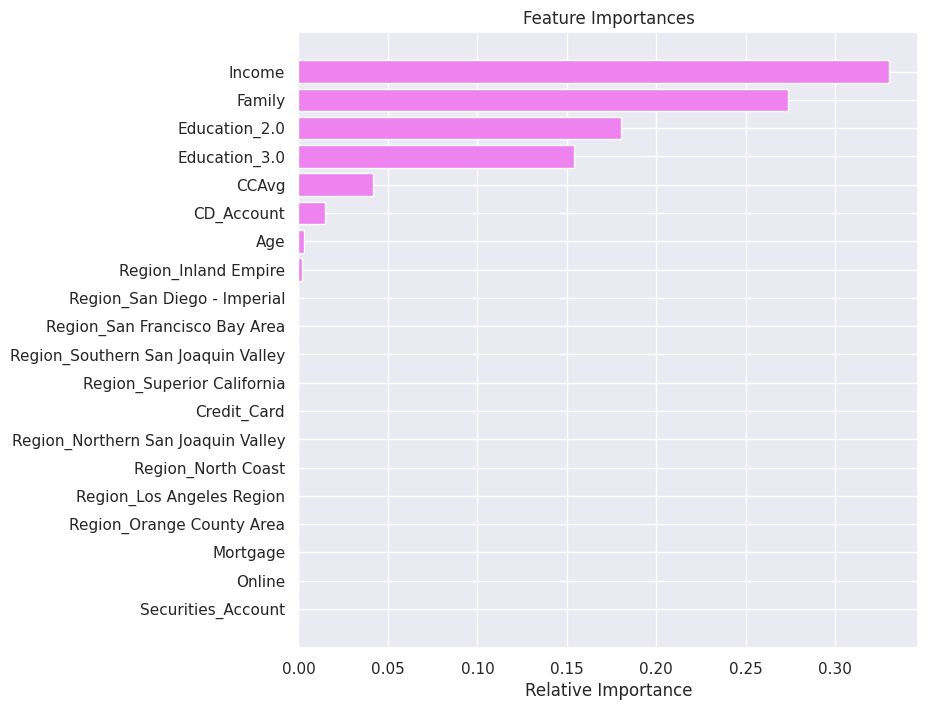

In [77]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Post Pruning

In [78]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [79]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000141    0.000564
2     0.000238    0.001040
3     0.000250    0.001540
4     0.000268    0.002076
5     0.000272    0.002620
6     0.000275    0.003721
7     0.000276    0.004273
8     0.000277    0.004827
9     0.000381    0.005208
10    0.000527    0.005735
11    0.000625    0.006360
12    0.000686    0.007046
13    0.000692    0.010507
14    0.000700    0.011207
15    0.000762    0.012731
16    0.000882    0.016260
17    0.000940    0.017200
18    0.001305    0.018505
19    0.001647    0.020153
20    0.002333    0.022486
21    0.002407    0.024893
22    0.003294    0.028187
23    0.006473    0.034659
24    0.025146    0.084951
25    0.039216    0.124167
26    0.047088    0.171255

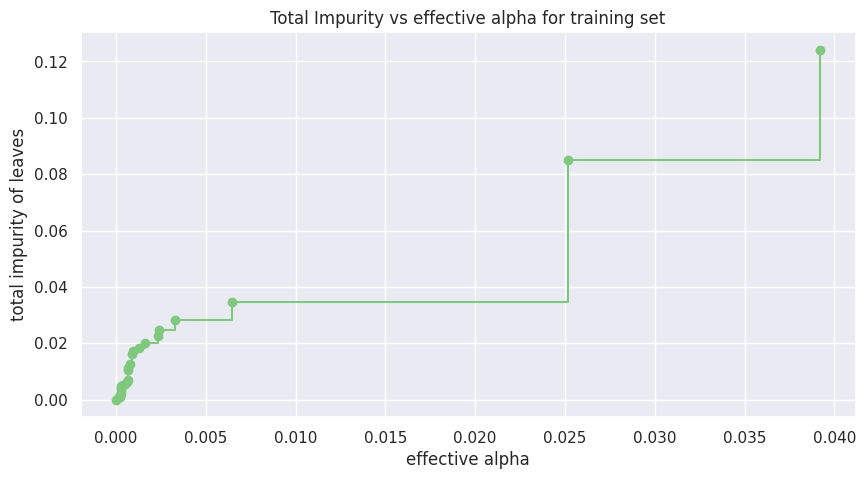

In [80]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [81]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


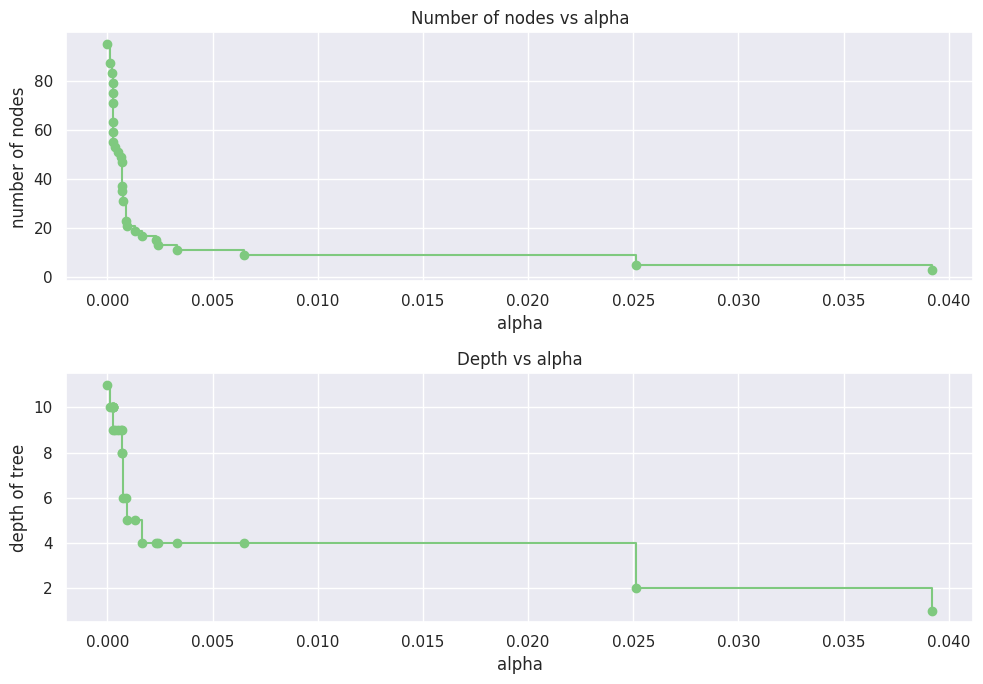

In [82]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [83]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [84]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [85]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

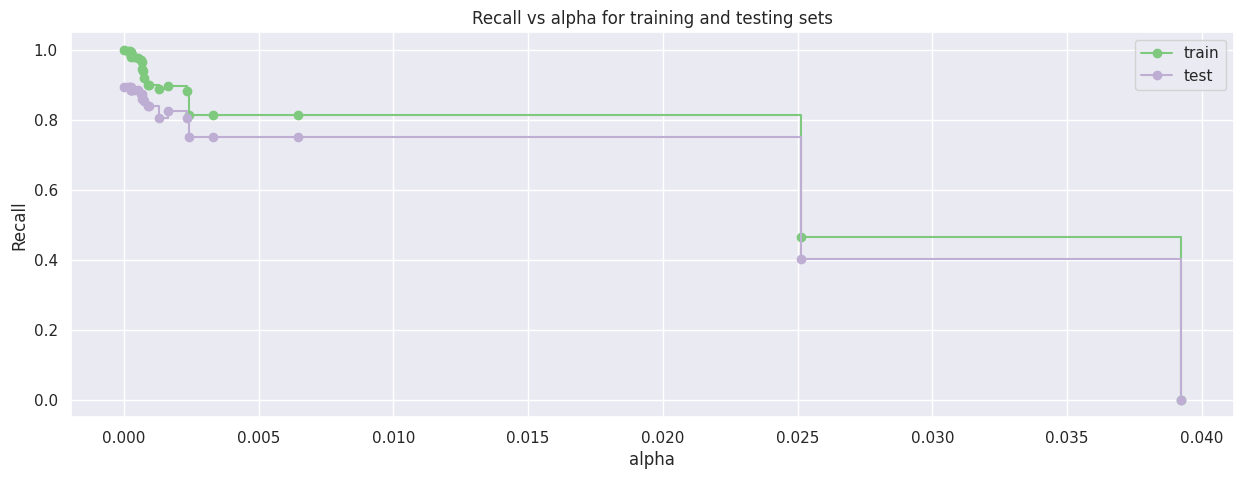

In [86]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [87]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=1)


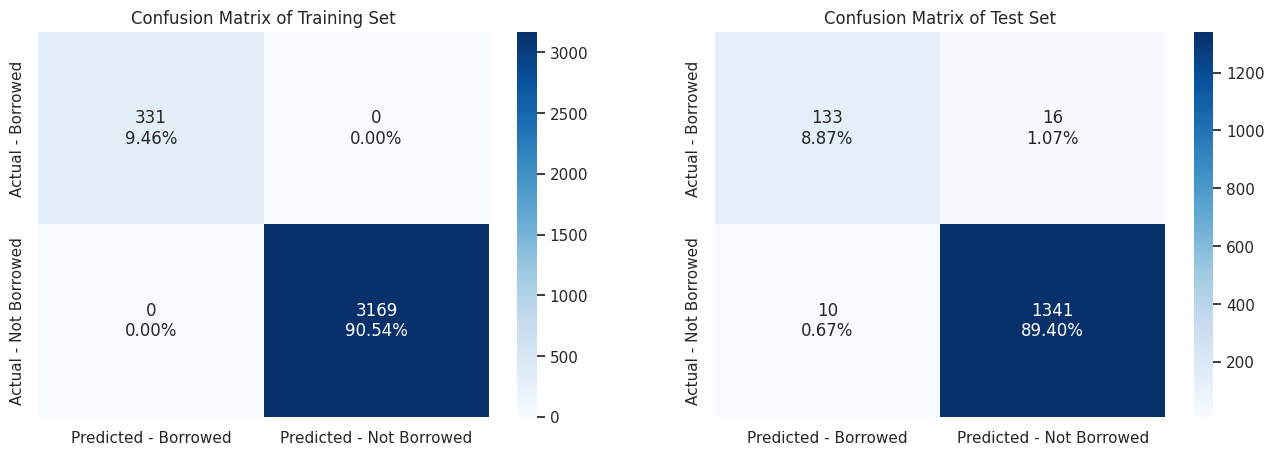

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

In [88]:
model4 = best_model
fig, axes = plt.subplots(1,2,figsize=(16,5));
make_confusion_matrix(model4, X_train, y_train, i=0, seg='Training')
make_confusion_matrix(model4, X_test, y_test, i=1, seg='Test')

In [89]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [90]:
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

Accuracy    Recall  Precision        F1
0  0.982667  0.892617    0.93007  0.910959

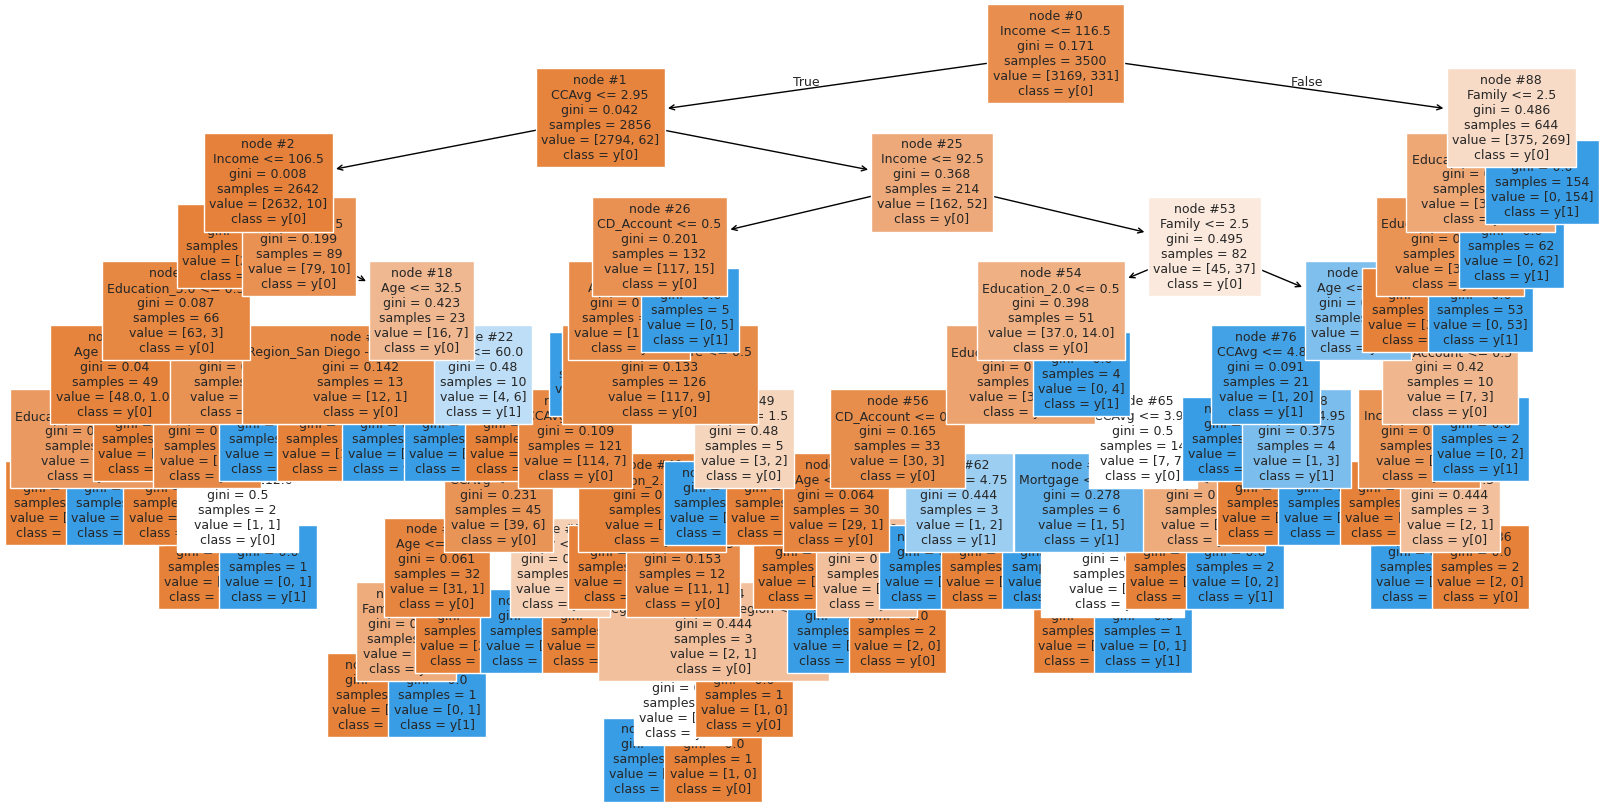

In [91]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [92]:
importances = model4.feature_importances_
indices = np.argsort(importances)

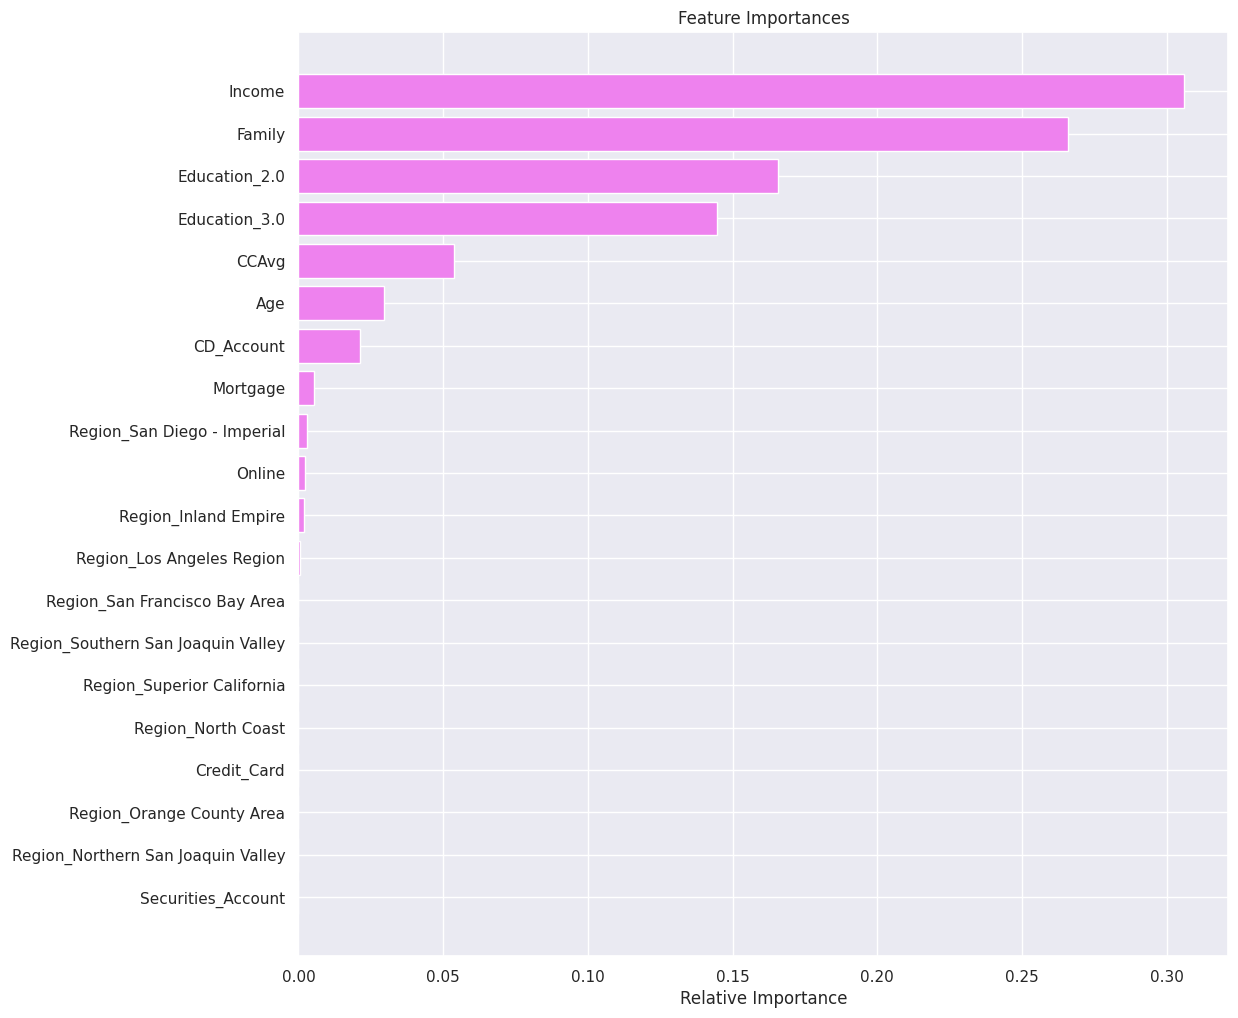

In [93]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Post Pruning (Class Weight Balanced)

In [94]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.91, 1:0.09})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [95]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -5.631968e-15
1   4.115352e-20 -5.631927e-15
2   8.668914e-19 -5.631060e-15
3   1.248324e-18 -5.629812e-15
4   1.248324e-18 -5.628564e-15
5   1.248324e-18 -5.627315e-15
6   8.907482e-16 -4.736567e-15
7   1.542458e-05  6.169831e-05
8   3.068750e-05  1.230733e-04
9   3.077049e-05  2.461553e-04
10  4.912036e-05  4.917571e-04
11  5.259271e-05  8.599060e-04
12  5.942864e-05  9.787633e-04
13  6.058135e-05  1.039345e-03
14  6.092363e-05  1.222116e-03
15  6.108544e-05  1.344286e-03
16  8.262818e-05  1.840056e-03
17  1.143756e-04  1.954431e-03
18  2.049045e-04  2.159336e-03
19  3.000714e-04  4.559907e-03
20  2.924351e-03  7.484258e-03
21  3.485391e-03  1.096965e-02
22  4.635169e-03  2.023999e-02

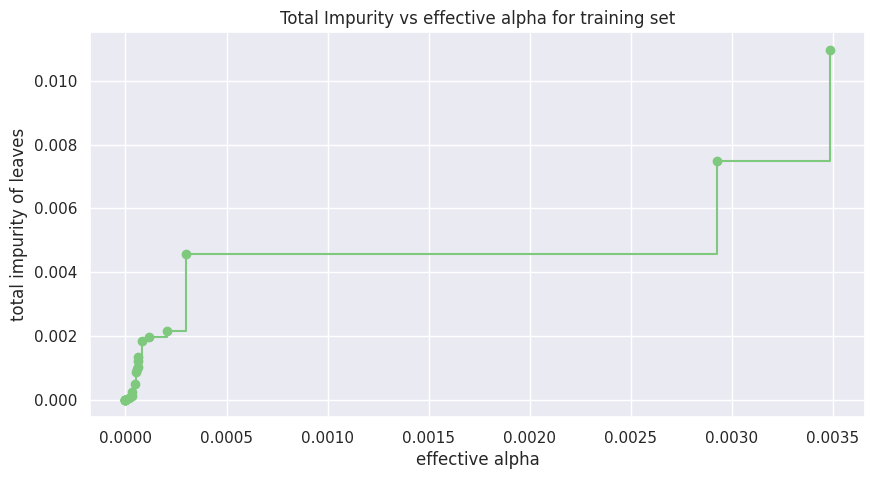

In [96]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [97]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.91, 1:0.09}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.004635169054390086


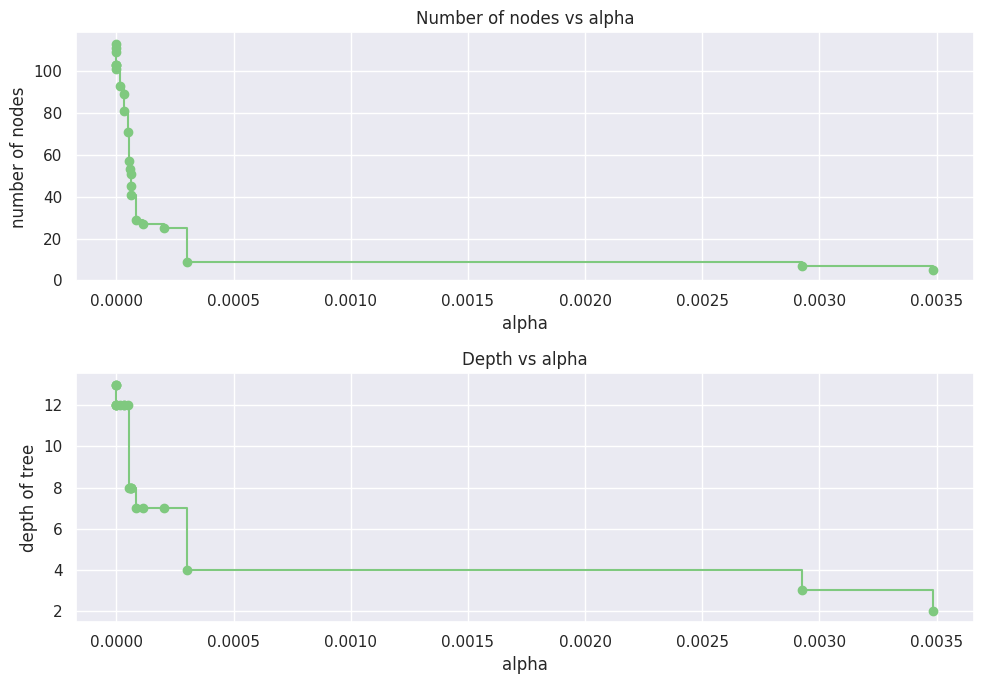

In [98]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [99]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [100]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [101]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

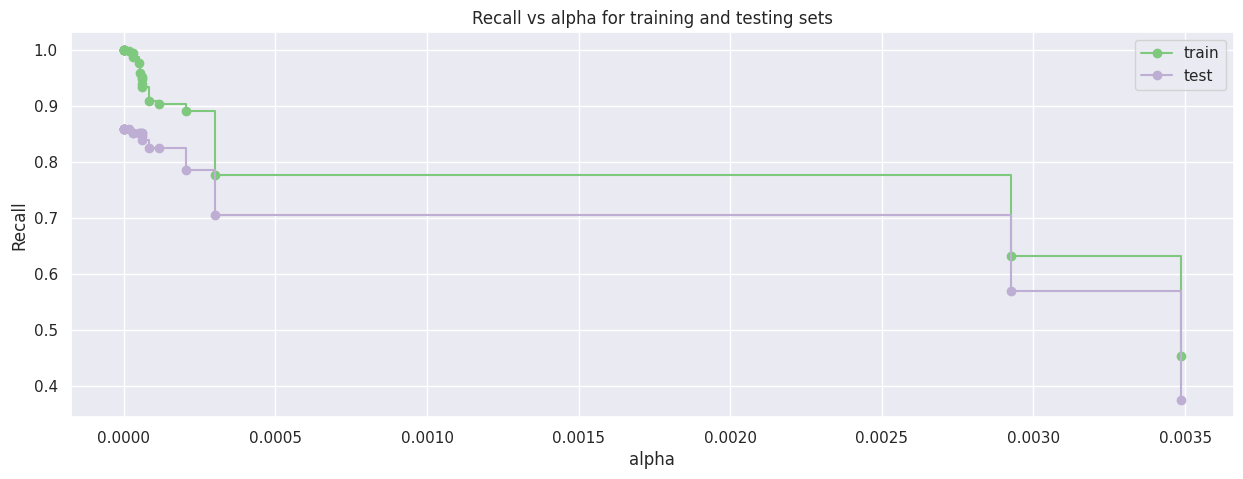

In [102]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [103]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0),
                       class_weight={0: 0.91, 1: 0.09}, random_state=1)


In [104]:
model5 = best_model

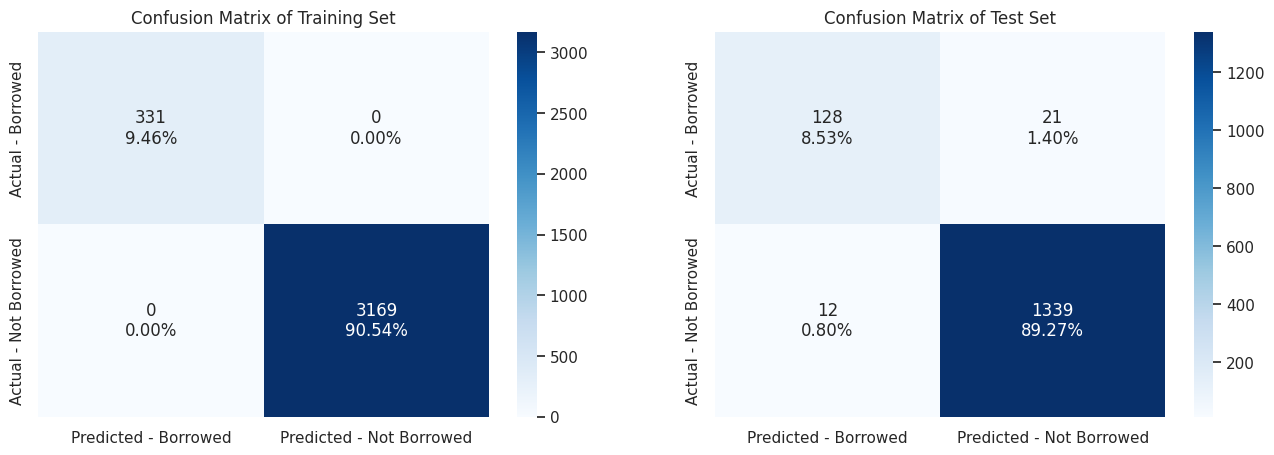

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

In [105]:
fig, axes = plt.subplots(1,2,figsize=(16,5));
make_confusion_matrix(model5, X_train, y_train, i=0, seg='Training')
make_confusion_matrix(model5, X_test, y_test, i=1, seg='Test')

In [106]:
decision_tree_post_perf_train_bal = model_performance_classification_sklearn(
    model5, X_train, y_train
)
decision_tree_post_perf_train_bal

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [107]:
decision_tree_post_test_bal = model_performance_classification_sklearn(
    model5, X_test, y_test
)
decision_tree_post_test_bal

Accuracy   Recall  Precision        F1
0     0.978  0.85906   0.914286  0.885813

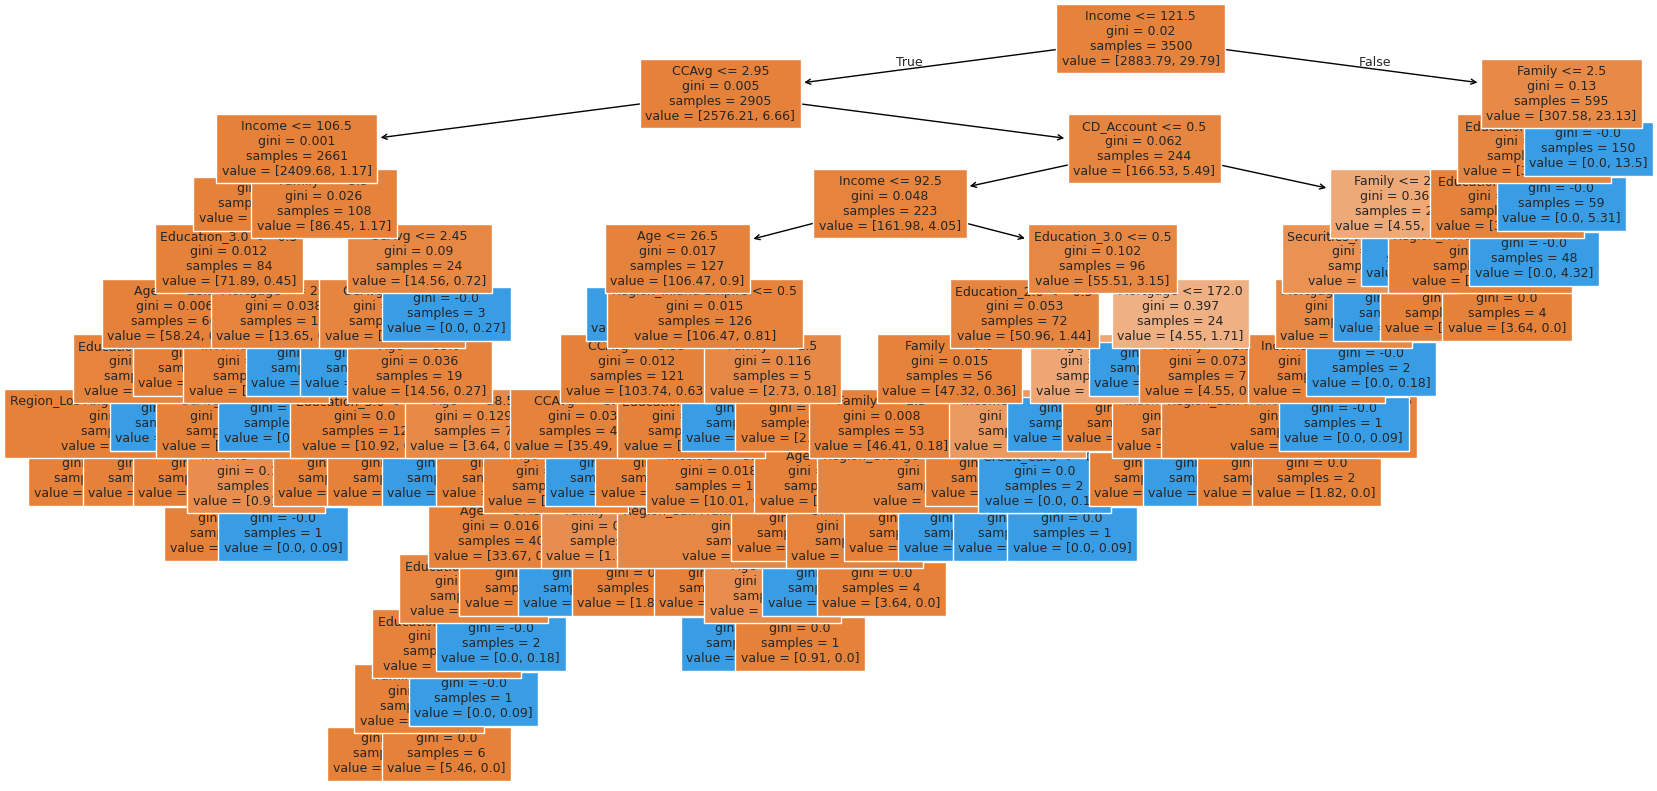

In [108]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model5,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [109]:
importances = model5.feature_importances_
indices = np.argsort(importances)

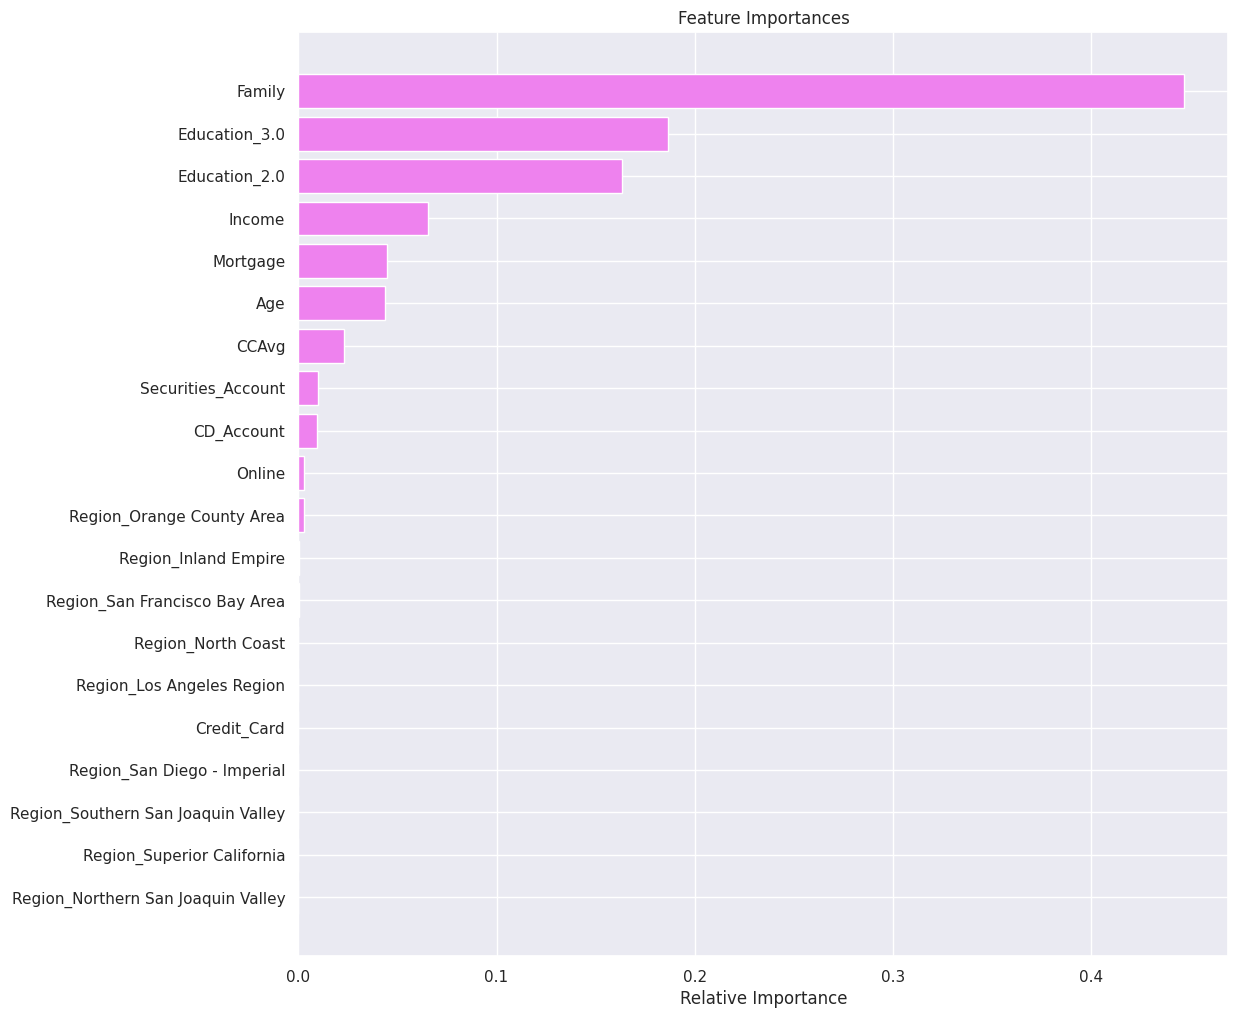

In [110]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Final Model Selection

In [111]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
        decision_tree_post_perf_train_bal.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Decision Tree (Post-Pruning) with class_weight",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                               1.0                              1.0   
Recall                                 1.0                              1.0   
Precision                              1.0                              1.0   
F1                                     1.0                              1.0   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  \
Accuracy                      0.989429                           1.0   
Recall                        0.912387                           1.0   
Precision                     0.974194                           1.0   
F1                            0.942278                           1.0   

           Decision Tree (Post-Pruning) with class_weight  
Accuracy                                              1.0  
Recall                                                1.0  
Precision                                             1.0  
F1                                                    1.0

In [112]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
        decision_tree_post_test_bal.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Decision Tree (Post-Pruning) with class_weight",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                          0.982667                         0.978667   
Recall                            0.892617                         0.859060   
Precision                         0.930070                         0.920863   
F1                                0.910959                         0.888889   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  \
Accuracy                      0.984000                      0.982667   
Recall                        0.865772                      0.892617   
Precision                     0.969925                      0.930070   
F1                            0.914894                      0.910959   

           Decision Tree (Post-Pruning) with class_weight  
Accuracy                                         0.978000  
Recall                                           0.859060  
Precision                                        0.914286  
F1                                               0.885813

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

* The goal was to predict which customers would purchase a personal loan, to understand which customer attributes impact this decision, and identify which customers to target more.

* In order to solve these three goals, we created a DecisionTree model and evaluated based on the highest recall. This is because we wanted to minimie the number of False Negatives. We created four trees with the Post-Pruning Cost Complexity tree being the best model with a recall of 89% and accuracy of 98%.

* According to the decision tree, Income, Education 2 & 3, and Family sizes of 3 & 4 are the most important attributes for predicting which customers buy a Personal Loan.

* From this we recommend that the company focus on customers with a high income (over 100k), with a Masters or PhD/Professional degree, have 3-4 family members, and have high expenditures.

* The company can also have a range of markerting strategies to attract customers from medium incomes.

___

In [113]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [114]:
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

In [115]:
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [116]:
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9826666666666667
Recall on training set :  1.0
Recall on test set :  0.8523489932885906
Precision on training set :  1.0
Precision on test set :  0.9694656488549618


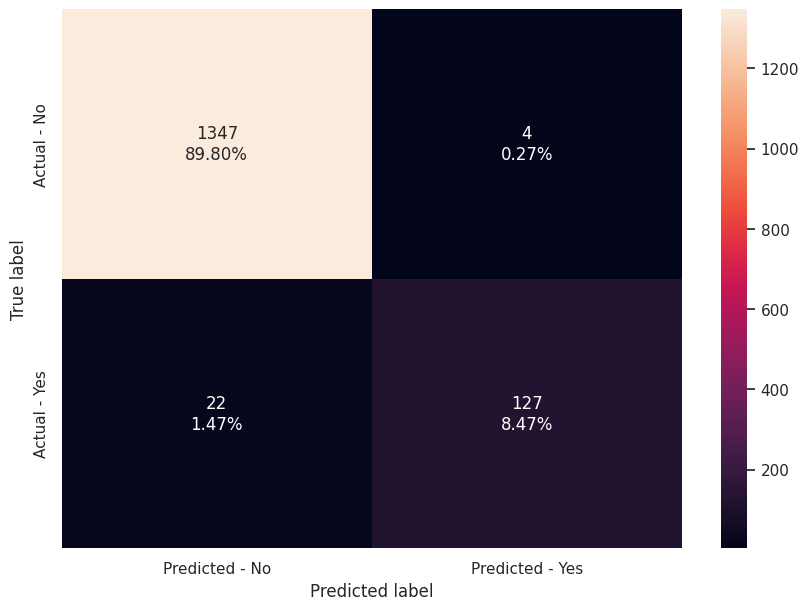

In [117]:
make_confusion_matrix(bagging_estimator,y_test)

In [118]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=np.float64(0.5000000000000001),
                       max_samples=np.float64(0.5),
                       min_samples_leaf=np.int64(5), n_estimators=150,
                       random_state=1)

In [119]:
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.99
Accuracy on test set :  0.9773333333333334
Recall on training set :  0.9093655589123867
Recall on test set :  0.8053691275167785
Precision on training set :  0.9836601307189542
Precision on test set :  0.96


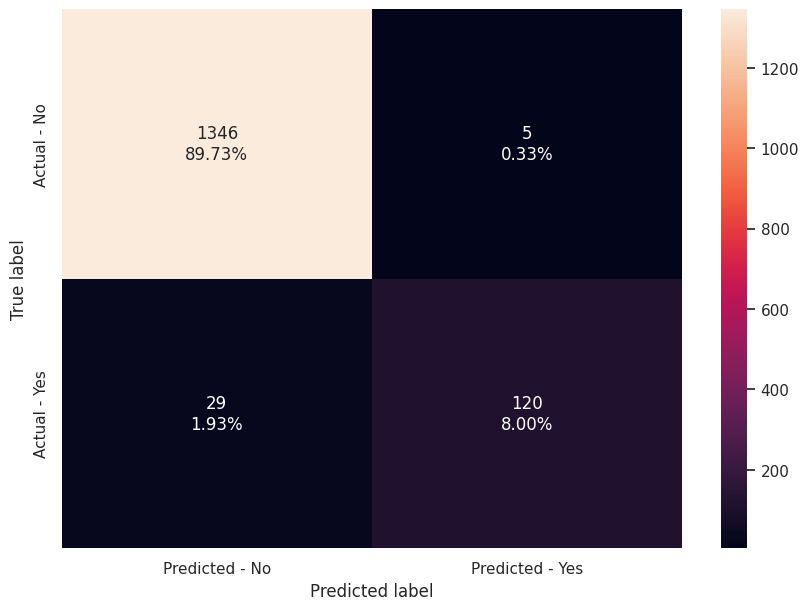

In [120]:
make_confusion_matrix(rf_estimator_tuned, y_test)

In [121]:
# Choose the type of classifier.
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.91, 1: 0.09}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=np.float64(0.6000000000000001),
                       max_samples=np.float64(0.4),
                       min_samples_leaf=np.int64(9), random_state=1)

In [122]:
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.988
Accuracy on test set :  0.978
Recall on training set :  0.9214501510574018
Recall on test set :  0.8322147651006712
Precision on training set :  0.9501557632398754
Precision on test set :  0.9393939393939394


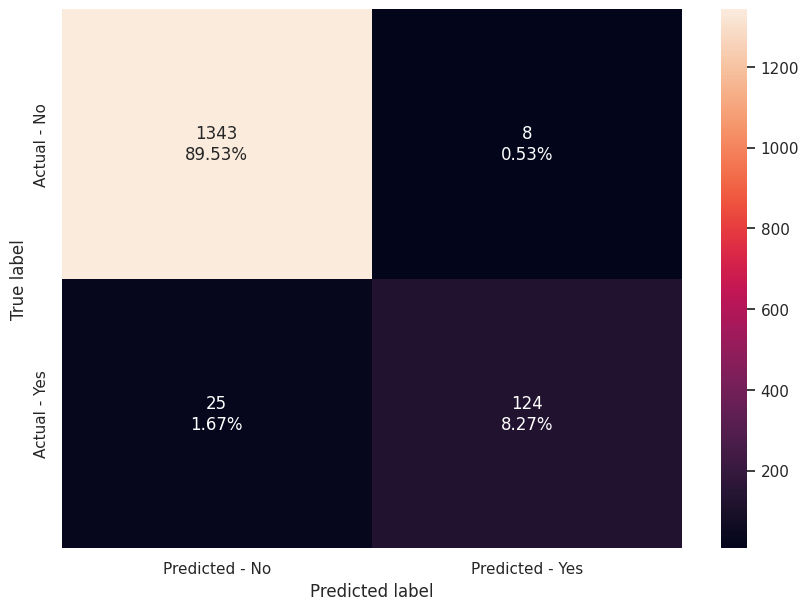

In [123]:
make_confusion_matrix(rf_estimator_weighted,y_test)